## C Class project - Finbee - Predicting default on P2P loans

Project details - https://github.com/mokahaiku/toai_workshops
Data [Finbee.lt](https://www.finbee.lt/apie-mus/paskolu-portfelio-eksportas/)

When investing in P2P loans everyone wants to reduce risk. 

With help of ML we can try to build models and predict which users are good investments and which are not.



**Requirements**
* Do exploratory data analysis. (Ok vs Default loans)
* Do feature engineering.
* Do feature preprocessing.
* Build a machine learning model.
* Explore your model results.

**Bonus Points**
* Move your final model to a Python module.
* Compare multiple machine learning models.
* Do hyperparameter tuning.
* Deploy the model on your own machine.
* Deploy the model on external service.

**To do**:
* Use a pipeline
* Data imputation etc.
* Analyse feature importance in models


### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime
from datetime import date
import holidays

### Reading file

In [2]:
data_xls = pd.read_excel('loans.xlsx', index_col=None)
data_xls.to_csv('loans.csv', encoding='utf-8', index=False)
df = pd.read_csv('loans.csv', parse_dates=['creation_date'])
pd.set_option('display.max_columns', None)  

### Exploring data


**listing_id**	Unikalus numeris, kuris suteikiamas kiekvienai paskolai.

**creation_date**	Paskolos paraiškos pateikimo data.

**loan_paid_date**	Paskolos išmokėjimo data.

**first_installement_date**	Pirmos mėnesinės įmokos data.

**loan_paid_status**	Paskolos išmokėjimo statusas (1 – paskola išmokėta, 0 – paskola dar neišmokėta).

**confirm_status**	Paskolos statusas (1 – paskolos gavėjas priėmė paskolos pasiūlymą, 3 – paskola pilnai grąžinta).

**username**	Paskolos gavėjo vartotojo vardas.

**listing_title**	Unikalus paskolos pavadinimas.

**listing_category**	Paskolos paskirtis.

**credit_score**	Paskolos gavėjui suteiktas kredito rizikos balas.

**job_loss_insurance**	Paskolos gavėjui netekus darbo ne savo noru ADB „Gjensidige“ mokės paskolos įmokas iki 6 mėn. (1 – galioja draudimas nuo priverstinio nedarbo, 0 – draudimas nuo priverstinio nedarbo negalioja).

**loan_amount**	Paskolos suma.

**loan_period**	Paskolos terminas mėnesiniais.

**effective_rate**	Paskolos palūkanų norma, kurią paskolos gavėjas moka investuotojams.

**preferred_rate**	Pageidaujama paskolos gavėjo palūkanų norma.

**amount_outstanding**	Likusi negrąžinta paskolos dalis šiai dienai.

**monthly_installment**	Mėnesinė paskolos įmoka.

**principal_repaid**	Grąžinta paskolos dalis.

**interest_paid**	Paskolos gavėjo sumokėtų palūkanų suma.

**arrears**	Visų vėluojančių paskolos įmokų suma.

**loan_status**	Paskolos būsena (ok – nėra vėluojančių įmokų, late – praleista viena paskolos įmoka, arrears – praleistos dvi 

paskolos įmokos, default – praleistos trys ir daugiau paskolos įmokos).

**type**	Paskolos tipas (B – paskola sufinansuota aukcione).

**gender**	Paskolos gavėjo lytis.

**post_town**	Miestas, kuriame gyvena paskolos gavėjas.

**age**	Paskolos gavėjo amžius.

**education**	Paskolos gavėjo išsilavinimas.

**employment_status**	Paskolos gavėjo darbo sutarties tipas paskolos išdavimo momentu.

**occupation**	Paskolos gavėjo užimamos pareigos paskolos išdavimo momentu.

**employ_how_long**	Paskolos gavėjo darbo trukmė mėnesiais dabartinėje darbovietėje.

**years_working_in_total**	Paskolos gavėjo darbo stažas metais.

**dependants**	Nepilnamečių vaikų/išlaikytinių skaičius.

**marital_status**	Paskolos gavėjo vedybininis statusas.

**credit_check_date**	Paskolos gavėjo mokumo vertinimo data.

**monthly_income**	Paskolos gavėjo namų ūkio pajamos, kurias jis gavo paskolos suteikimo metu. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio pajamas sudaro tik jo vieno pajamos.

**monthly_expenses**	Paskolos gavėjo namų ūkio mokamos kitų paskolų įmokos. Jeigu paskolos gavėjas nėra susituokęs, tuomet namų ūkio paskolų įmokas sudaro tik jo vieno paskolų įmokos.

**available_income**	Grynosios pajamos apskaičiuojamos pagal formulę: namų ūkio mėnesio pajamos – namų ūkio turimų kitų paskolų įmokos.

**dti**	Visų paskolų įmokų ir pajamų santykis apskaičiuojamas pagal formulę: namų ūkio turimų ir naujų paskolų mėnesinės įmokos / namų ūkio grynosios mėnesio pajamos.

**outstanding_debts**	Esama nepadengta skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

**last_debt_date**	Data, kada buvo registruota paskutinė skola bet kuriam iš kreditorių, komunalinių, telekomunikacinių paslaugų tiekėjų ir pan., apie kurią buvo informuotas kreditų biuras.

In [3]:
df

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date
0,32692,2019-09-04,2019-09-05,2019-10-05,1,1,Raimonda98,"""32692-Automobiliui",Car,D,0,3305,36,0.2600,0.26,3305.00,150.63,0.00,0.00,0.0,ok,FR,Female,Prienų r.,21,Vocational education,Employed,Rušiuotojas / Sorting operator,6,3,0,Single,2019-09-04 00:00:00,503,0,503,0.2995,0,-
1,32691,2019-09-04,2019-09-05,2019-10-05,1,1,bkar,"""32691-Vartojimui",Other Purposes,D,0,1900,36,0.2600,0.26,1900.00,86.59,0.00,0.00,0.0,ok,FR,Male,Joniškio r.,25,Vocational education,Employed,Mechanikas / Mechanic,3,4,0,Single,2019-09-04 00:00:00,345,17,328,0.3003,0,2018-01-04 00:00:00
2,32687,2019-09-04,2019-09-05,2019-10-05,1,1,vl771013,"""32687-Vartojimui",Other Purposes,C,0,665,12,0.1900,0.19,665.00,63.79,0.00,0.00,0.0,ok,FR,Female,Vilnius,41,Graduate,Employed,Vadybininkė / Manager,60,6,1,Married,2019-09-04 00:00:00,1060,197,863,0.2460,0,2016-11-30 00:00:00
3,32674,2019-09-04,2019-09-04,2019-10-04,1,1,karturas,"""32674-Vartojimui",Other Purposes,B,0,1040,12,0.1300,0.13,1040.00,96.26,0.00,0.00,0.0,ok,FR,Male,Vilnius,26,High school,Employed,Vairuotojas / Driver,36,7,1,Married,2019-09-04 00:00:00,484,0,484,0.1989,0,-
4,32666,2019-09-04,2019-09-05,2019-10-05,1,1,RasaMeska,"""32666-Vartojimui",Other Purposes,B,0,2830,24,0.1300,0.13,2830.00,143.81,0.00,0.00,0.0,ok,FR,Female,Panevėžys,33,Post graduate,Employed,Socialinė darbuotoja / Social worker,15,3,2,Married,2019-09-04 00:00:00,849,21,828,0.1941,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,38,2015-08-19,2015-08-25,2015-09-25,1,3,Elegi,"""Paskolu refinansavimui",Consolidation of Other Loans,D,0,2250,18,0.3156,0.30,0.00,158.52,2250.01,603.37,0.0,ok,B,Female,"Trakų rajonas, Bražuolės kaimas",40,Graduate,Employed,Barmenė,72 or more,12,2,Married,-,420,0,420,0.3626,0,-
9010,28,2015-08-18,2015-08-21,2015-09-21,1,3,egle,"""Persiskolinti",Consolidation of Other Loans,C,0,2000,27,0.2583,0.25,0.00,1277.55,2000.01,458.90,0.0,ok,B,Female,Šilutė,36,Post graduate,Employed,Valstybės tarnautoja/Public servant,48,8,0,Single,2015-11-17 00:00:00,900,127,773,0.2496,0,-
9011,3,2015-08-13,2015-08-20,2015-09-20,1,3,Algirdas,"""Vartojimo paskola, vartojimui, mokinimosi išl...",Other Purposes,D,0,1300,24,0.2525,0.25,0.00,690.85,1299.99,294.96,0.0,ok,B,Male,Kaunas,29,Post graduate,Employed,Inžinierius-projektuotojas,9,2,0,Single,-,510,14,496,0.1635,0,-
9012,2,2015-08-12,2015-08-28,2015-09-27,1,1,Bitute,"""Refinansavimas",Consolidation of Other Loans,C,0,2700,54,0.2582,0.20,473.87,85.03,2226.13,1855.32,0.0,ok,B,Female,Vilnius,33,Post graduate,Employed,Specialistė / Specialist,60,10,0,Single,-,590,0,590,0.1292,0,-


In [4]:
#Remove rows with missing values
df.isnull().sum()
df = df.dropna()

#Keep only rows with 'ok' & 'default' loan_status
df = df[(df['loan_status'] == 'ok') | (df['loan_status'] == 'default')]


#Latest defaulted person '2019-06-01', remove recent loans
df = df[df['creation_date'] < '2019-06-02']
df.shape

(7690, 39)

In [5]:
ok_df = df[df['loan_status'] == 'ok']
default_df = df[df['loan_status'] == 'default']

### Exploratory data analysis EDA

posx and posy should be finite values


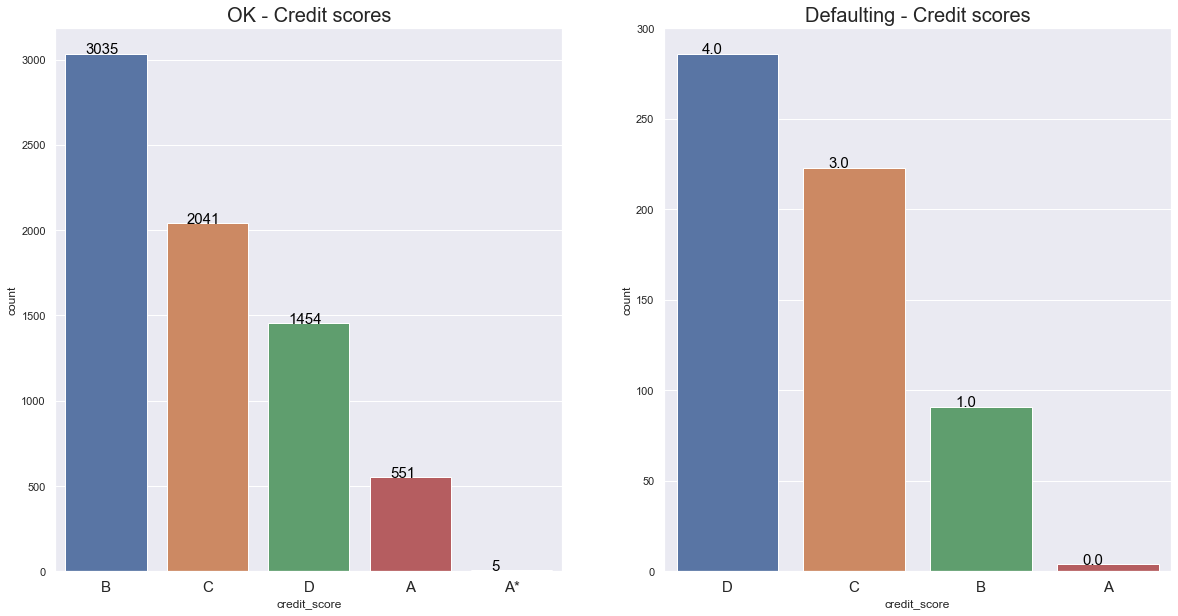

posx and posy should be finite values
posx and posy should be finite values


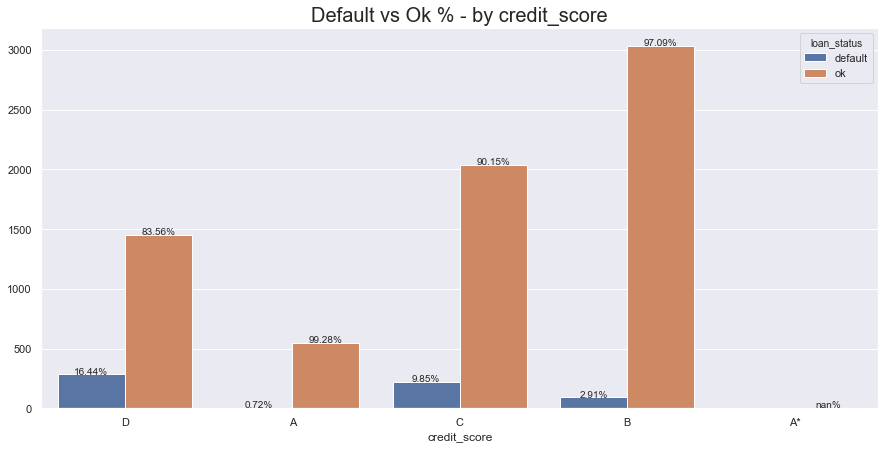

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
ax = sns.countplot(x='credit_score',data=ok_df, order=ok_df['credit_score'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("OK - Credit scores", fontsize=20)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)   
ax = sns.countplot(x='credit_score',data=default_df,order=default_df['credit_score'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Defaulting - Credit scores", fontsize=20)

total = len(df['credit_score'])

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((100*i.get_height()/total),)), fontsize=15, color='black'), 

    
plt.figure(figsize=(15,7))
order = sorted(df['credit_score'].unique())
ax3 = sns.countplot(x="credit_score", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by credit_score", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

## Avoid
* D - (16.44% of D loans) 
* C - (9.85% of C loans).
## Good ones:
* B - (2.91% of B loans)
* A - (0.72% of A loans)

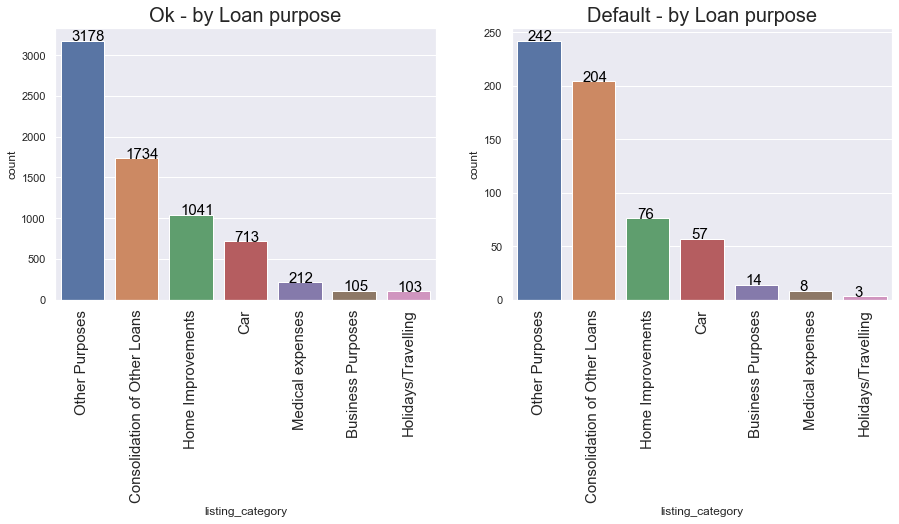

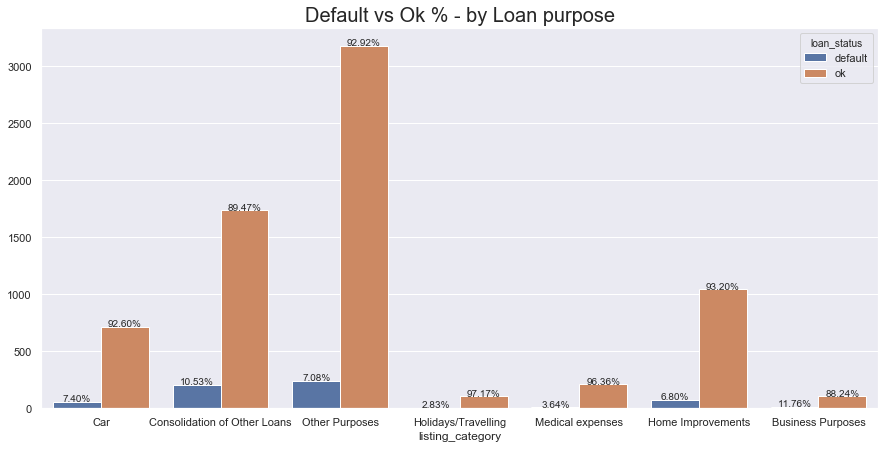

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='listing_category',data=ok_df,order=ok_df['listing_category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Ok - by Loan purpose", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)
ax = sns.countplot(x='listing_category',data=default_df,order=default_df['listing_category'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Default - by Loan purpose", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(15,7))
order = sorted(df['listing_category'].unique())
ax3 = sns.countplot(x="listing_category", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by Loan purpose", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

## Avoid:
* "Business Purposes" loans 11.76% from all default
* "Consolidation of other loans" 10.53% from all default

Text(0.5, 1.0, 'Loan amount in EUR range (Default vs OK)')

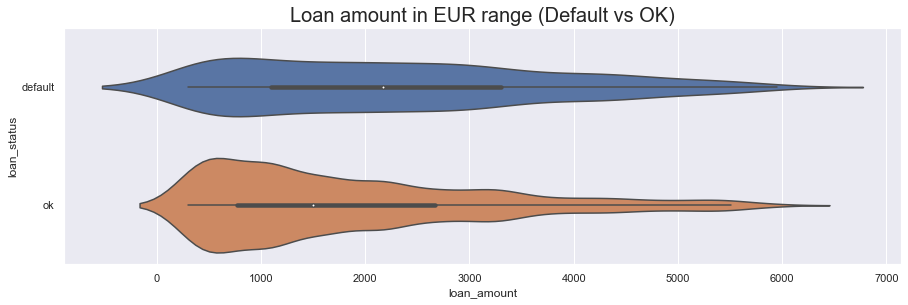

In [8]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax = sns.violinplot(x="loan_amount", y="loan_status", data=df[df['loan_amount']<6000])
ax.set_title('Loan amount in EUR range (Default vs OK)', fontsize=20)

Text(0.5, 1.0, 'Loan period range in months')

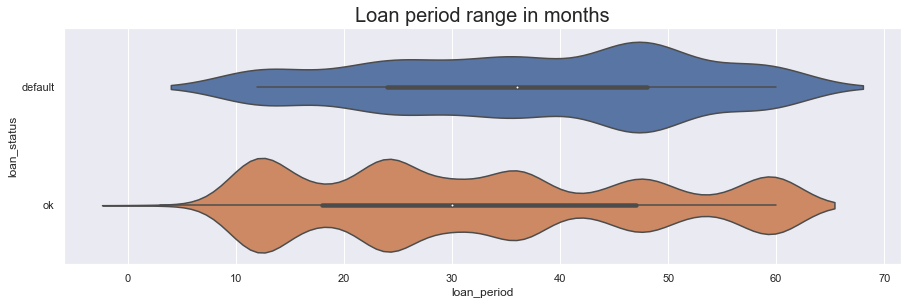

In [9]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,2)
ax2 = sns.violinplot(x='loan_period', y="loan_status" ,data=df,) 
ax2.set_title('Loan period range in months', fontsize=20)

Defaulting clients, prefer longer periods.

Text(0.5, 1.0, 'Loan rate %')

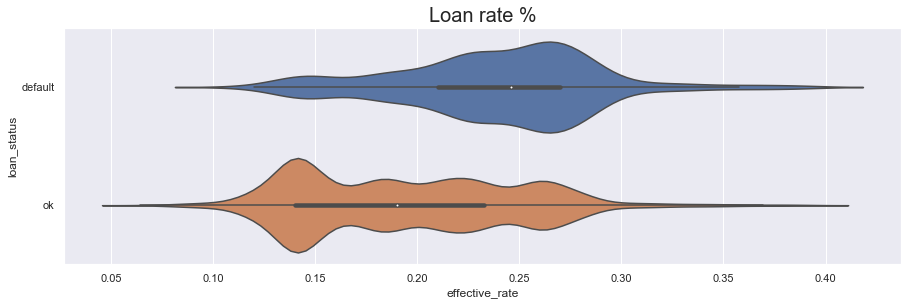

In [10]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='effective_rate', y="loan_status", data=df,) 
ax.set_title('Loan rate %', fontsize=20)

Defaulting clients are mostly those whos Loan rate < 20% +.

Text(0.5, 1.0, 'Monthly payment size in Eur')

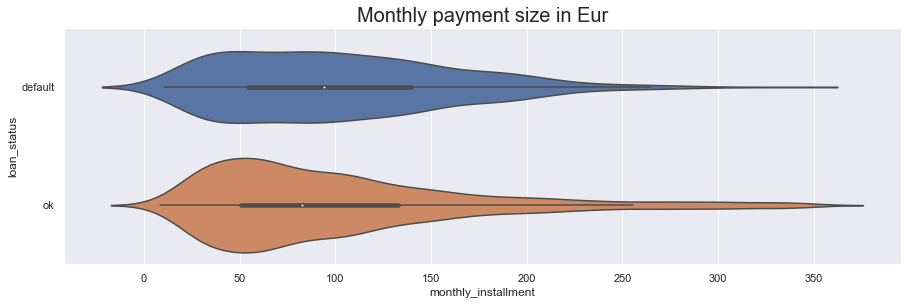

In [11]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,4)
ax = sns.violinplot(x='monthly_installment', y="loan_status", data=df[df['monthly_installment'] < 350], showfliers=False) 
ax.set_title('Monthly payment size in Eur', fontsize=20)

Text(0.5, 1.0, 'Default loans by Gender ')

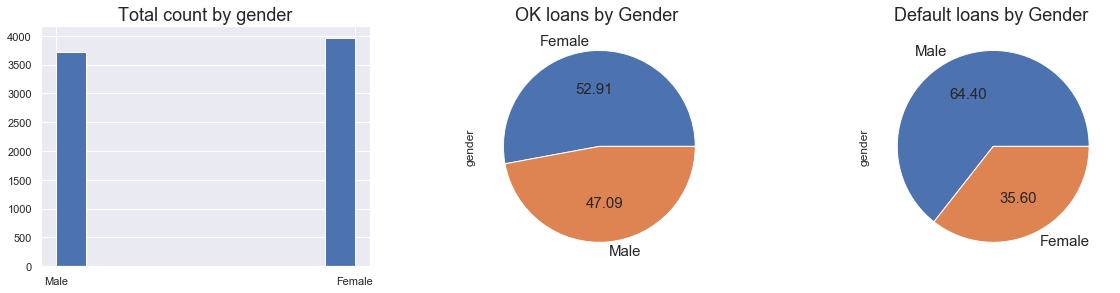

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
df.gender.hist().set_title("Total count by gender", fontsize=18)
plt.subplot(3,3,2)
ok_df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("OK loans by Gender ", fontsize=18 )
plt.subplot(3,3,3)
default_df['gender'].value_counts().plot.pie(autopct='%.2f', fontsize=15).set_title("Default loans by Gender ", fontsize=18 )

## Men are more risky than women. 64.4% vs 35.6%

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


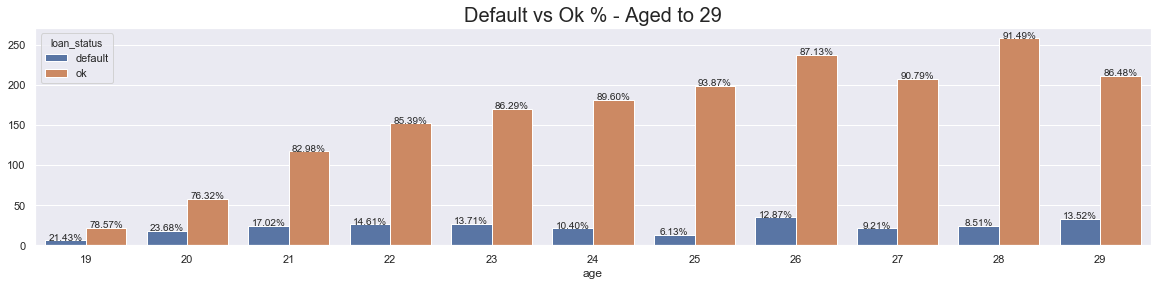

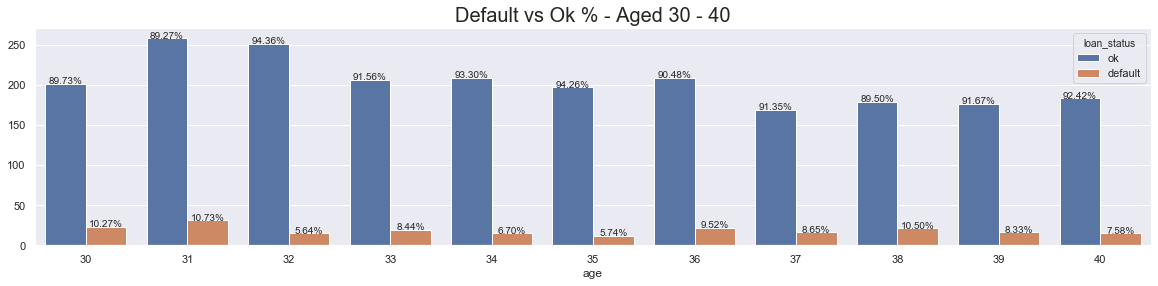

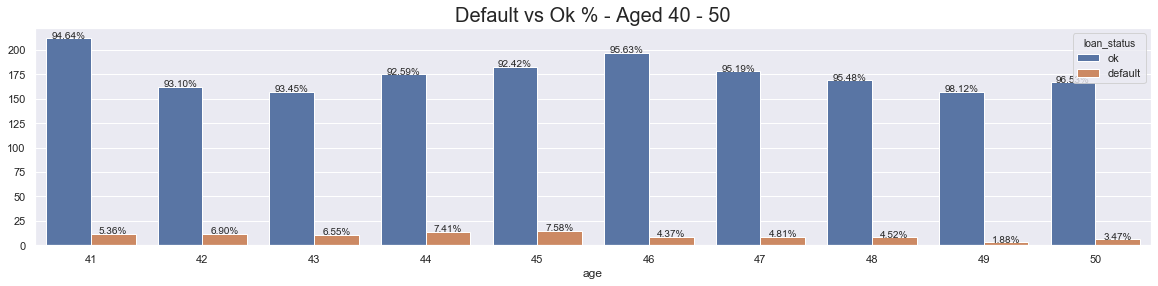

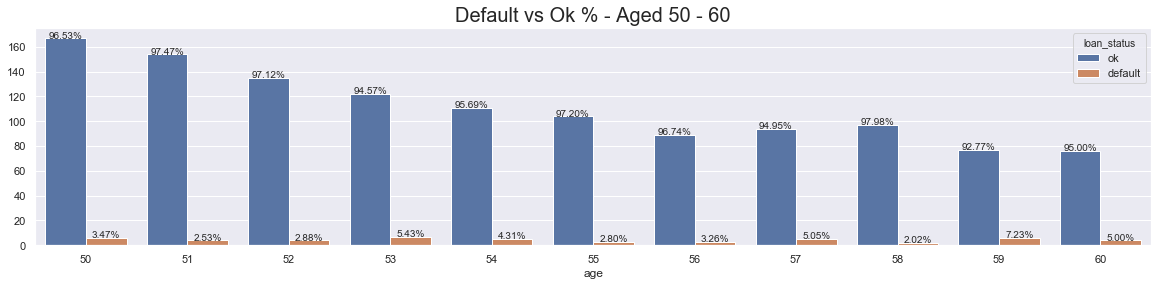

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


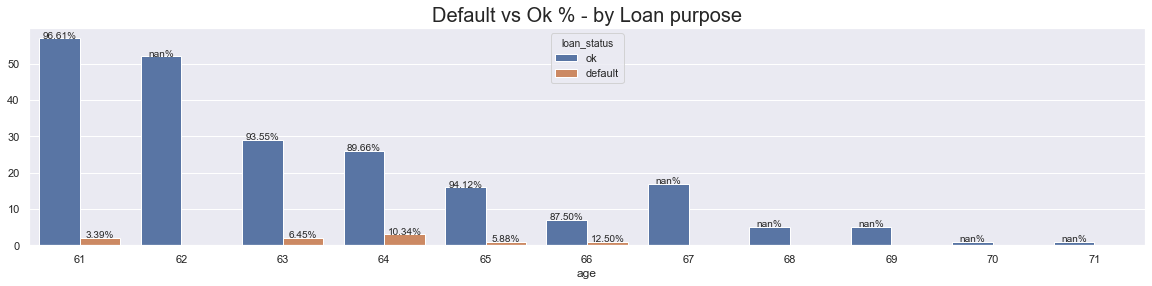

In [60]:
plt.figure(figsize=(20,4))
#order = sorted(df['age'].unique())
ax1 = sns.countplot(x="age", hue="loan_status", data=df[(df.age > 18) & (df.age < 30) ])
ax1.set_title("Default vs Ok % - Aged to 29", fontsize=20)
ax1.set_ylabel('')

bars = ax1.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax1.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax1.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")
    
plt.figure(figsize=(20,4))
#order = sorted(df['age'].unique())
ax3 = sns.countplot(x="age", hue="loan_status", data=df[(df.age > 29) & (df.age < 41) ])
ax3.set_title("Default vs Ok % - Aged 30 - 40", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")
    
    
plt.figure(figsize=(20,4))
#order = sorted(df['age'].unique())
ax3 = sns.countplot(x="age", hue="loan_status", data=df[(df.age > 40) & (df.age < 51) ])
ax3.set_title("Default vs Ok % - Aged 40 - 50", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")
    
    
plt.figure(figsize=(20,4))
#order = sorted(df['age'].unique())
ax3 = sns.countplot(x="age", hue="loan_status", data=df[(df.age > 49) & (df.age < 61) ])
ax3.set_title("Default vs Ok % - Aged 50 - 60", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")
    
plt.figure(figsize=(20,4))
order = sorted(df['age'].unique())
ax3 = sns.countplot(x="age", hue="loan_status", data=df[df.age > 60])
ax3.set_title("Default vs Ok % - by Loan purpose", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]


for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")


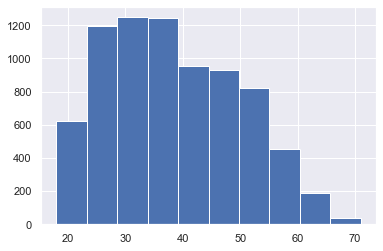

In [52]:
df.age.hist()

### Which are top 10 the most risky years, with largest Default %?

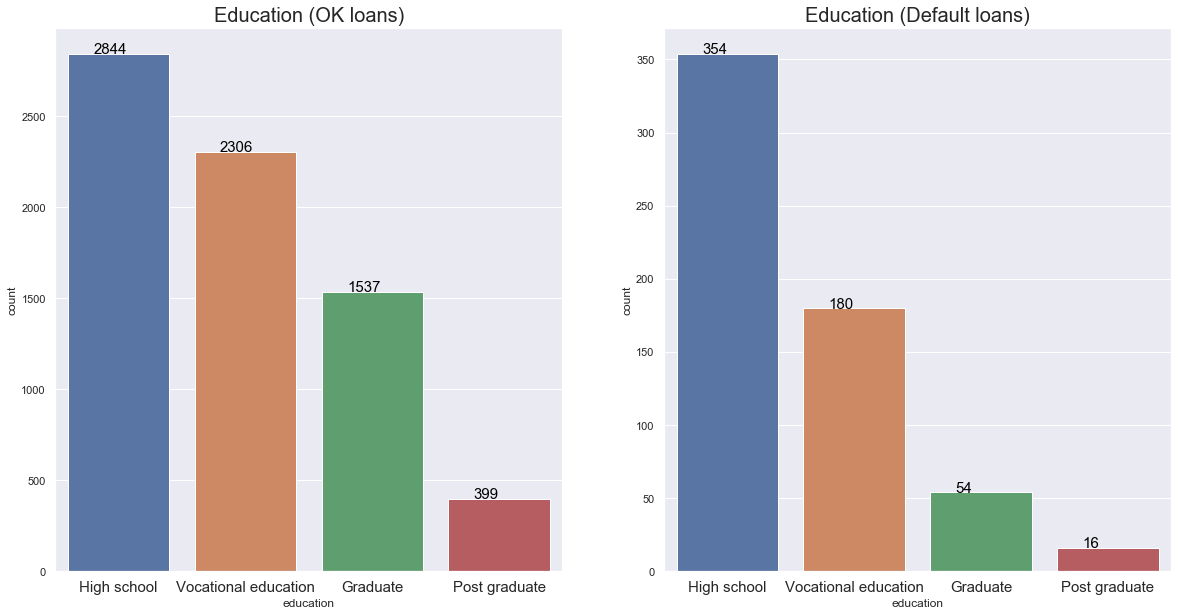

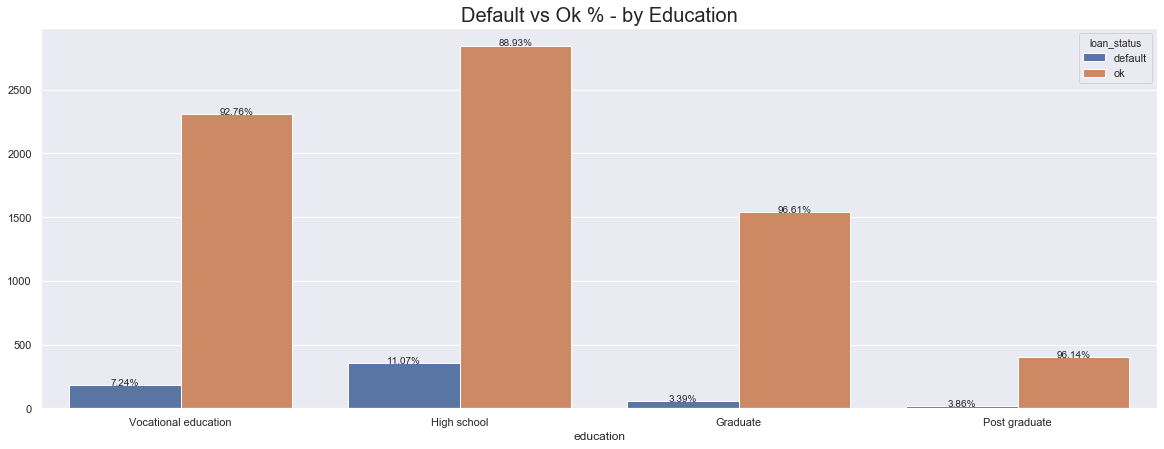

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1) 
ax = sns.countplot(x='education',data=ok_df,order=ok_df['education'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Education (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='education',data=default_df,order=default_df['education'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Education (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
    
plt.figure(figsize=(20,7))
order = sorted(df['education'].unique())
ax3 = sns.countplot(x="education", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by Education", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

## Risky:
* High School - 11.07%
* Vocational Edu - 7.24%

## Good choice:
* Graduates - 3.39% 
* st Graduates - 3.86%

posx and posy should be finite values
posx and posy should be finite values


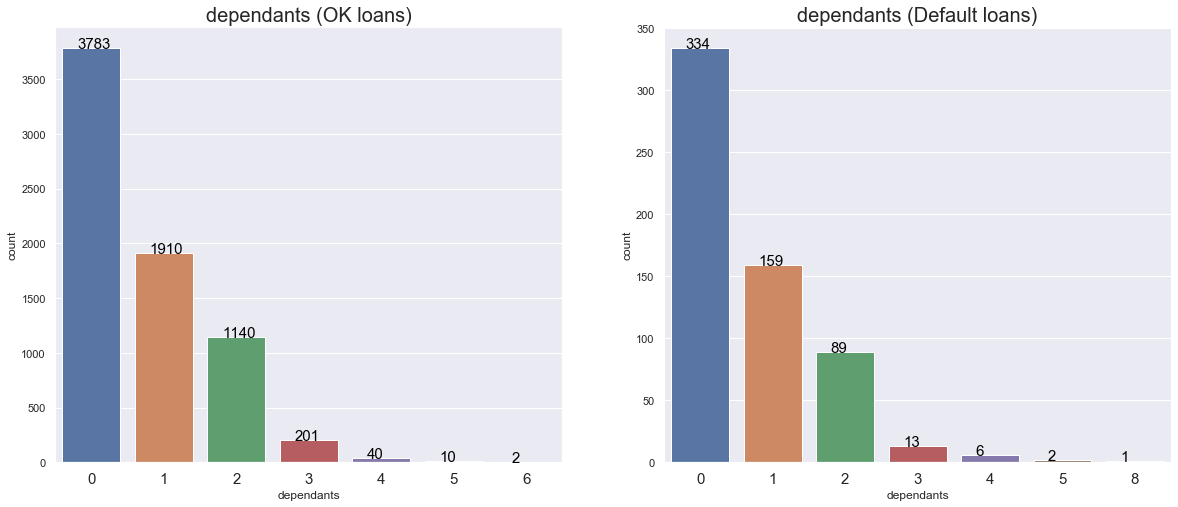

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


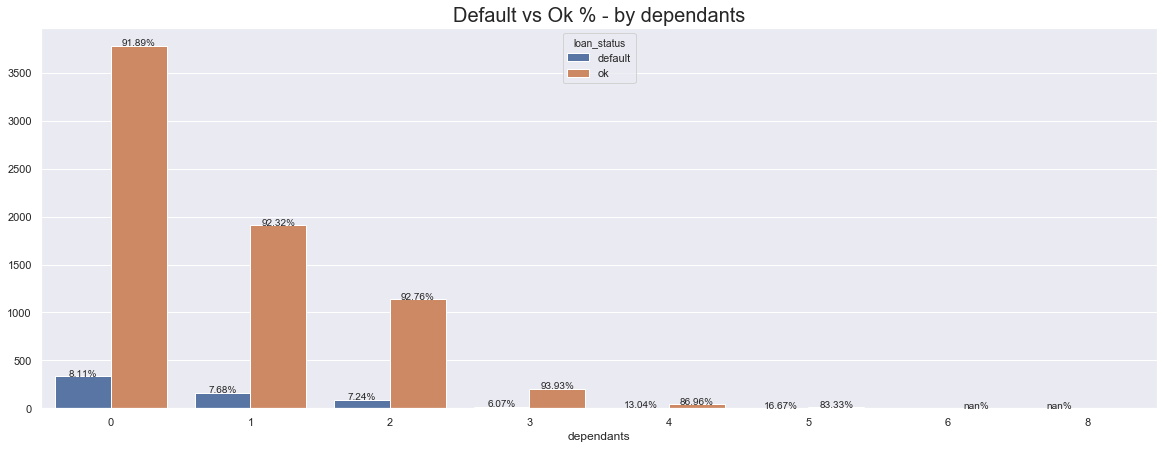

In [16]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='dependants',data=ok_df,order=ok_df['dependants'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("dependants (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='dependants',data=default_df,order=default_df['dependants'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("dependants (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
    
plt.figure(figsize=(20,7))
order = sorted(df['dependants'].unique())
ax3 = sns.countplot(x="dependants", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by dependants", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Risky:
* 5 children = 16.67% default (Only 12 values)
* 4 children = 13.04% default (Only 46 values)

### Better options:
* 0 children = 8.11% default
* 1 children = 7.68% default
* 3 children = 6.07% default


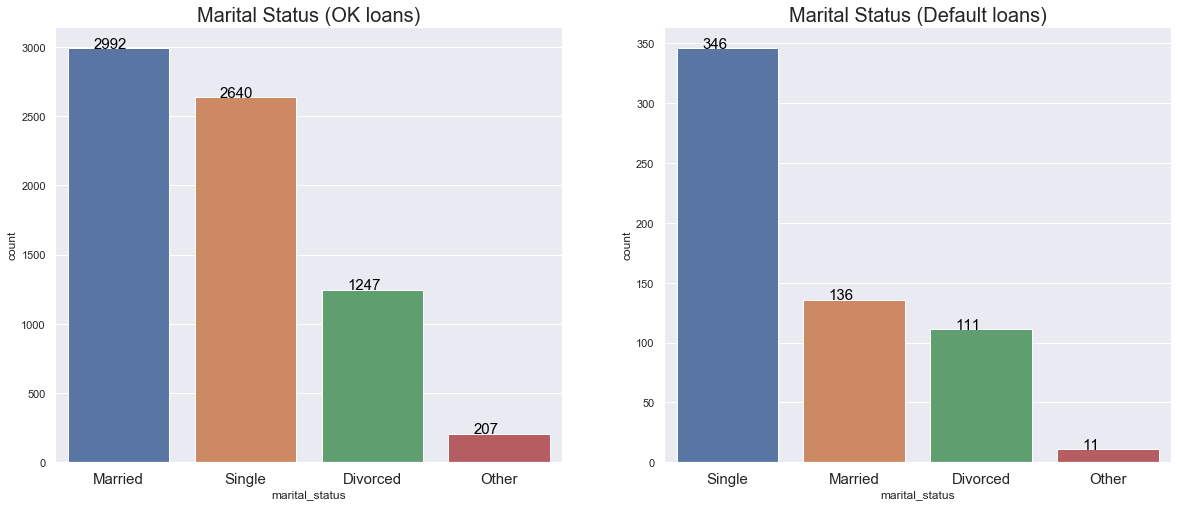

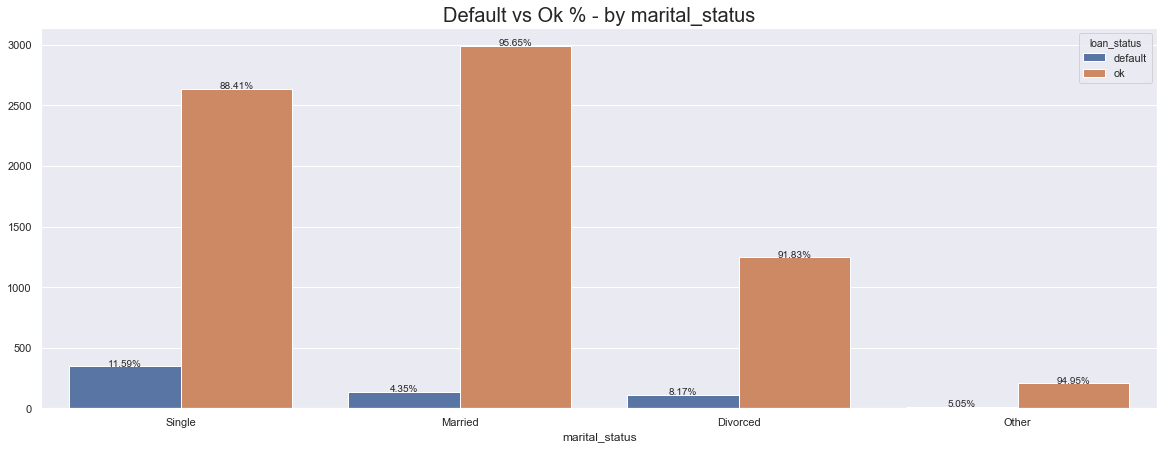

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='marital_status',data=ok_df);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Marital Status (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='marital_status',data=default_df);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Marital Status (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
    
plt.figure(figsize=(20,7))
order = sorted(df['marital_status'].unique())
ax3 = sns.countplot(x="marital_status", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by marital_status", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Risky:
* Single - 11.59%
* Divorced - 8.17%

### Good choice:
* Married - 4.35%

# Feature enginering

Extract from dates:
- Year +
- quarter +
- Month +
- Day of the week +
- Season (Summer, Winter, Autum, Spring) + 
- is holiday (Lithuanian holidays) +
- Week of year + 
- day of month +
- Day of year +
- weather?
- move cities to regions of lithuania, like (Aukstaitija etc...)
- Add age groups +

In [18]:
#Function to label data by season
def season(s):
    if s.month in [12,1,2]:
        return 'winter' 
    elif s.month in [3,4,5]:
        return 'spring' 
    elif s.month in [6,7,8]:
        return 'summer' 
    elif s.month in [9,10,11]:
        return 'autumn'
    

#Function to label data by season number    
def season_number(s):
    if s.season == 'winter':
        return 4 
    elif s.season == 'spring':
        return 1
    elif s.season == 'summer':
        return 2
    elif s.season == 'autumn':
        return 3
    
#Checks if day was a holiday
lithuanian_holidays = [] 
for date in holidays.Lithuania(years=[2015,2016,2018,2019]).items():
    lithuanian_holidays.append(date[0])
def inlithuanian_holidays(s):
    if s.creation_date in lithuanian_holidays:
        return 1
    else:
        return 0
    
#Function to sort people to age groups
def age_grouping(s):
    if s.age < 20:
        return "to 19"
    elif s.age >= 20 and s.age < 23:
        return "19 to 23"
    elif s.age >= 23 and s.age < 30:
        return "23 to 30"
    elif s.age >= 30 and s.age < 40:
        return "30 to 40"
    elif s.age >= 40 and s.age < 50:
        return "40 to 50"
    elif s.age >= 50 and s.age < 60:
        return "40 to 50"
    elif s.age >= 60:
        return "60+"

    
df['year'] = df.creation_date.dt.year
df['month'] = df.creation_date.dt.month
df['quarter'] = df.creation_date.dt.quarter
df['dayofweek'] = df.creation_date.dt.dayofweek + 1
df['dayofweek_name'] = df.creation_date.dt.weekday_name
df['is_weekend'] = np.where(df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
df['dayofmonth'] = df.creation_date.dt.day
df['dayofyear'] = df.creation_date.dt.dayofyear
df['week_number'] = df.creation_date.dt.week    
df['season'] =  df.apply(season, axis=1)
df['season_number'] =  df.apply(season_number, axis=1)
df['is_holiday'] = df.apply(inlithuanian_holidays, axis=1)
df['age_group'] = df.apply(age_grouping, axis=1)

## Continue EDA with Feature engineered Data

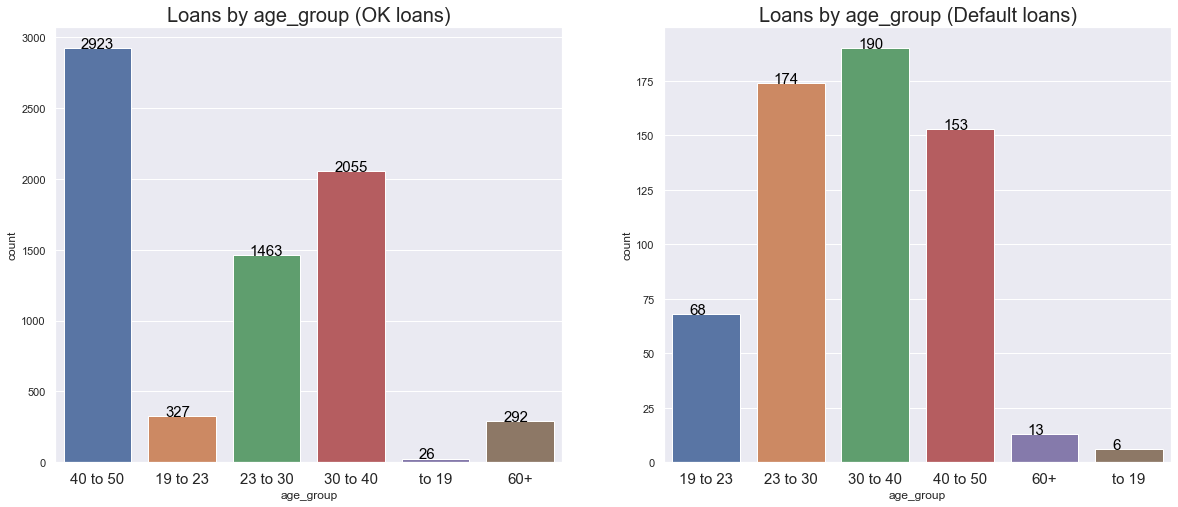

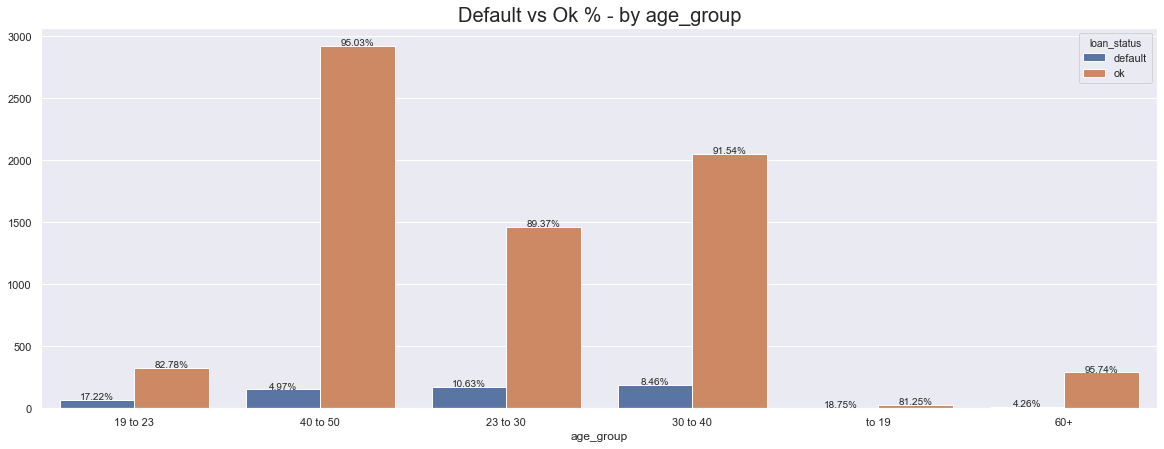

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='age_group',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by age_group (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='age_group',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by age_group (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['age_group'].unique())
ax3 = sns.countplot(x="age_group", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by age_group", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

### Avoid:
* 0 - 19 years old - 18.75%
* 19 - 23 years old - 17.22% 
* 23 - 30 years old - 10.63%
* 30 - 40 years old - 8.46%

### Good options:
* 40 - 50 years old - 4.97%
* 60+ years old - 4.26% 

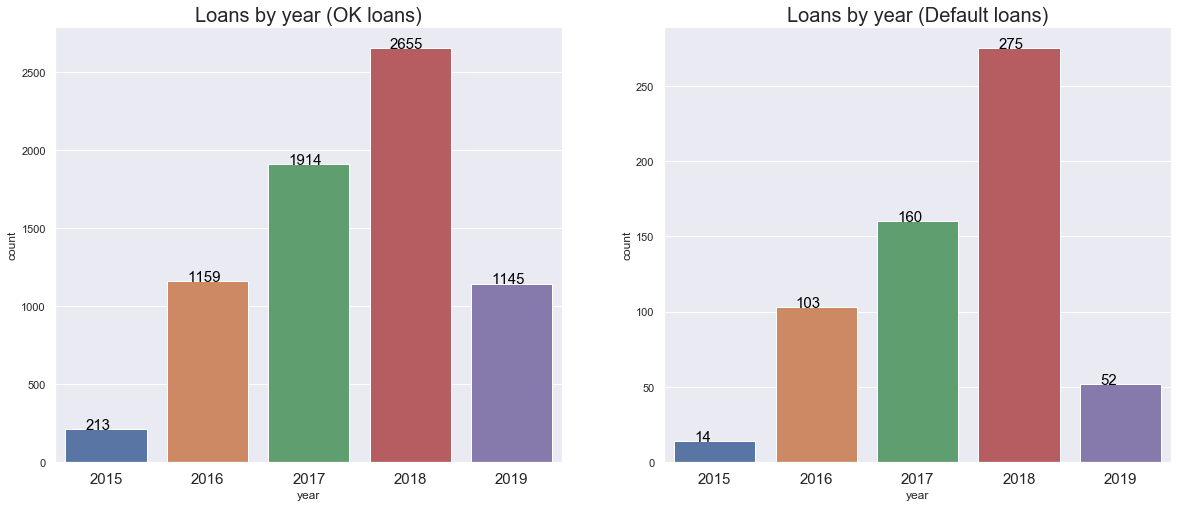

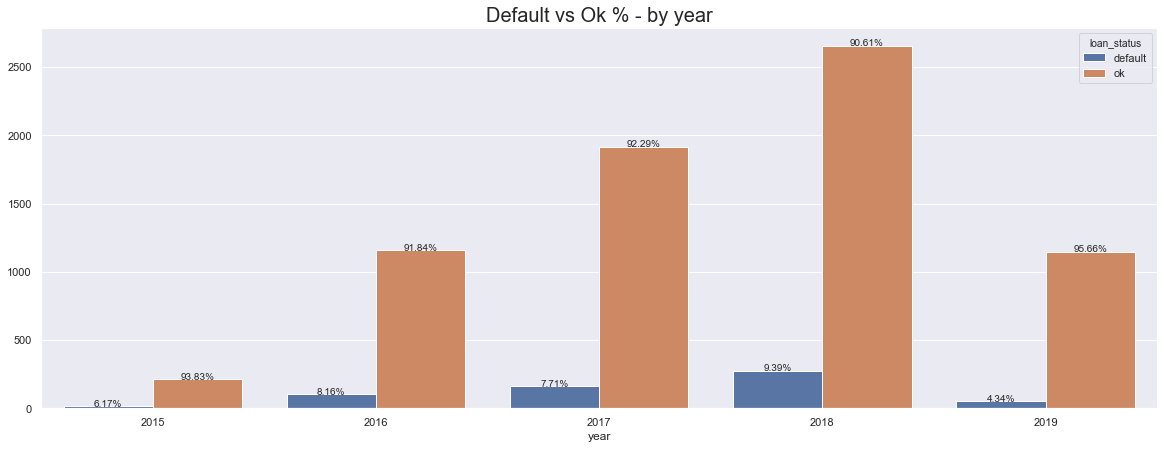

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='year',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by year (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='year',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by year (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['year'].unique())
ax3 = sns.countplot(x="year", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by year", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

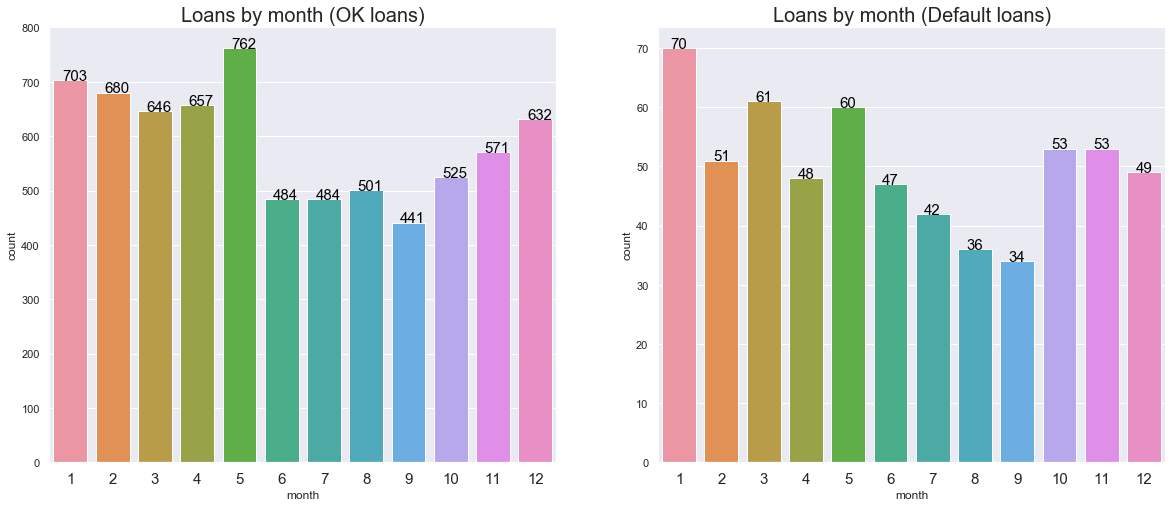

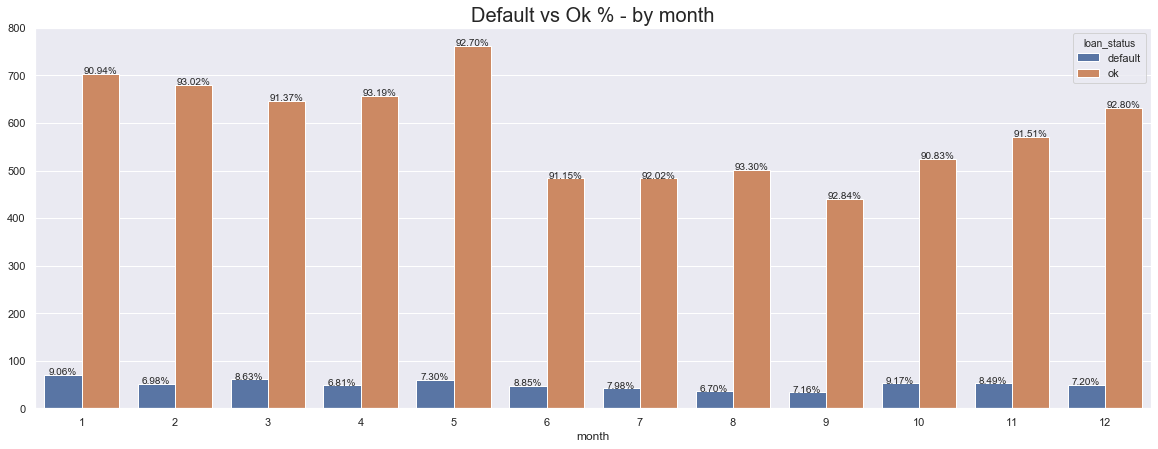

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='month',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by month (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='month',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by month (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['month'].unique())
ax3 = sns.countplot(x="month", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by month", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

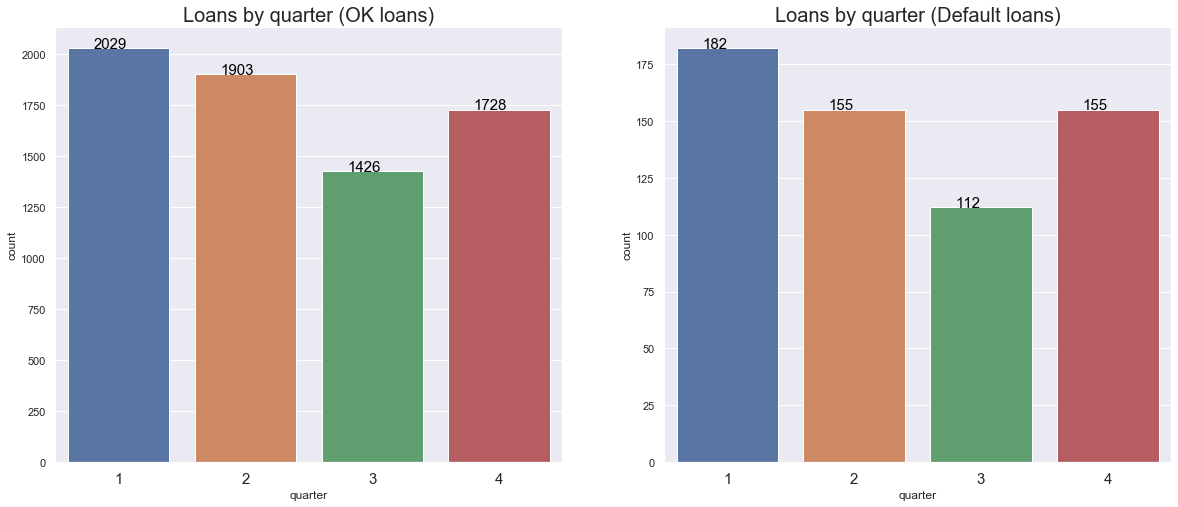

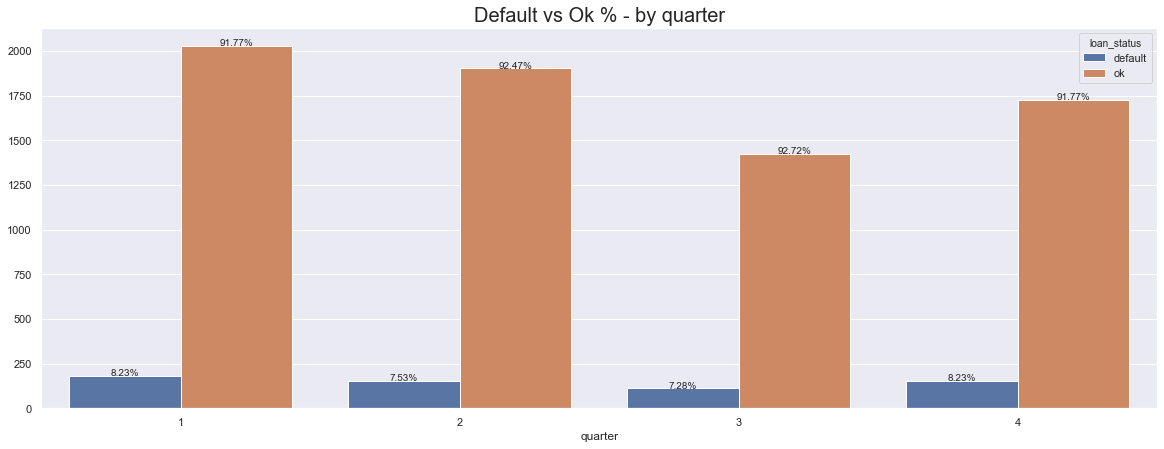

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='quarter',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by quarter (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='quarter',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by quarter (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['quarter'].unique())
ax3 = sns.countplot(x="quarter", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by quarter", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

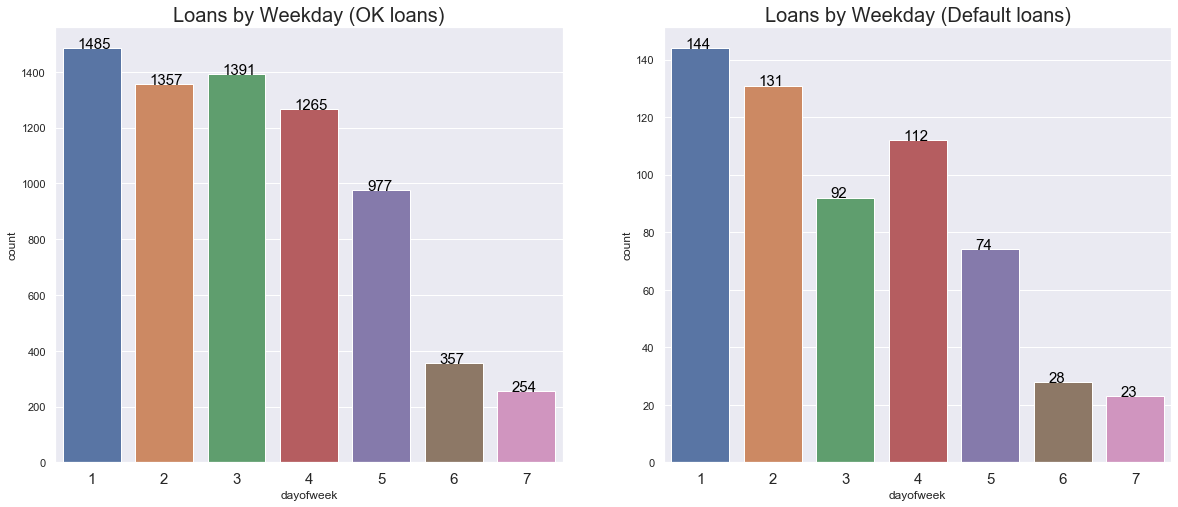

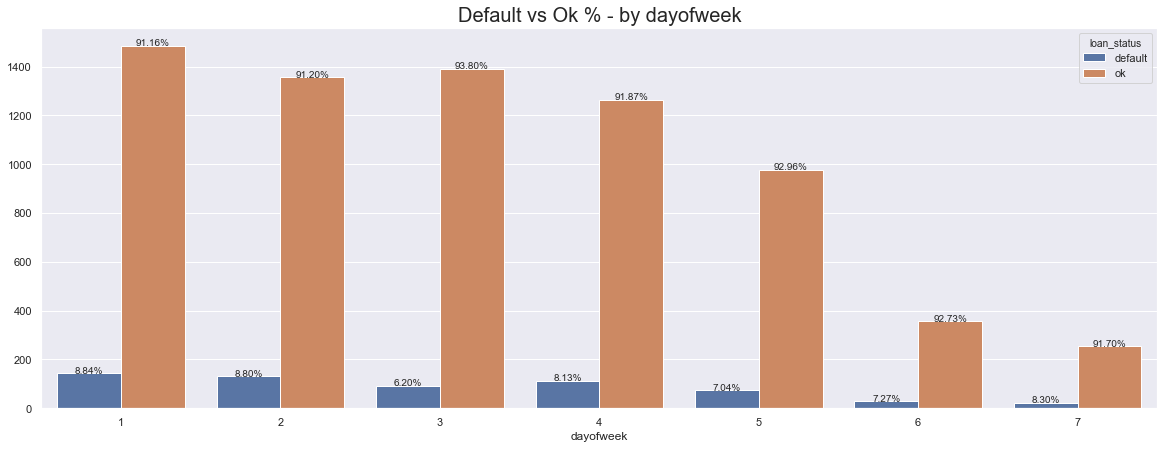

In [23]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='dayofweek',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by Weekday (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='dayofweek',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by Weekday (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['dayofweek'].unique())
ax3 = sns.countplot(x="dayofweek", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by dayofweek", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center")

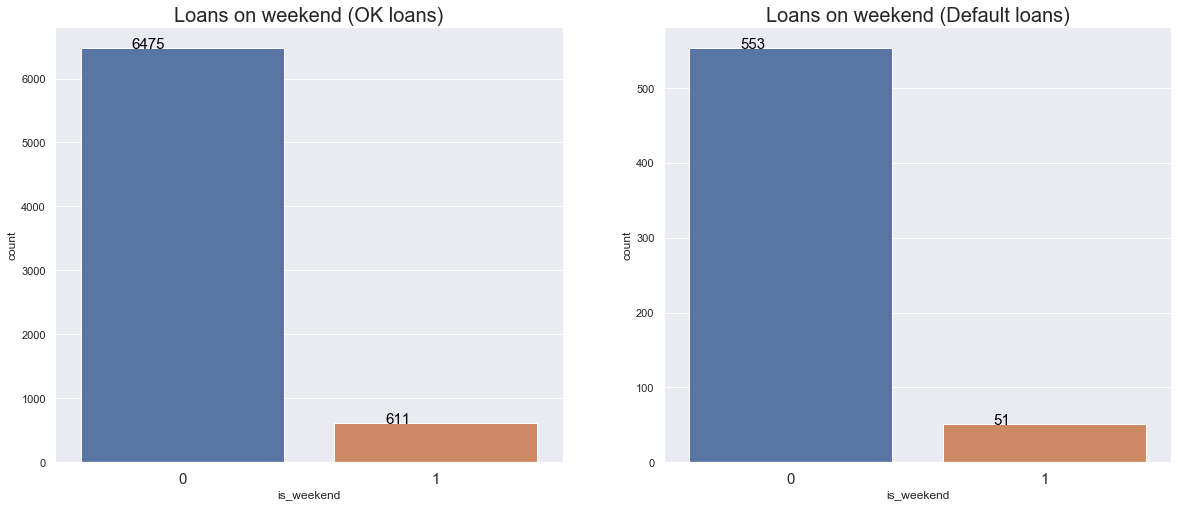

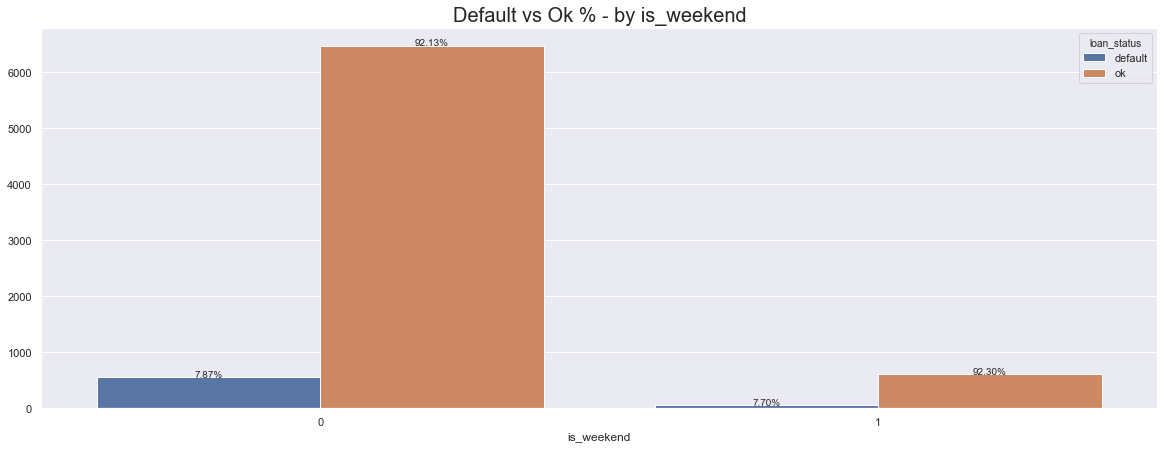

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='is_weekend',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans on weekend (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='is_weekend',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans on weekend (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['is_weekend'].unique())
ax3 = sns.countplot(x="is_weekend", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by is_weekend", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center") 

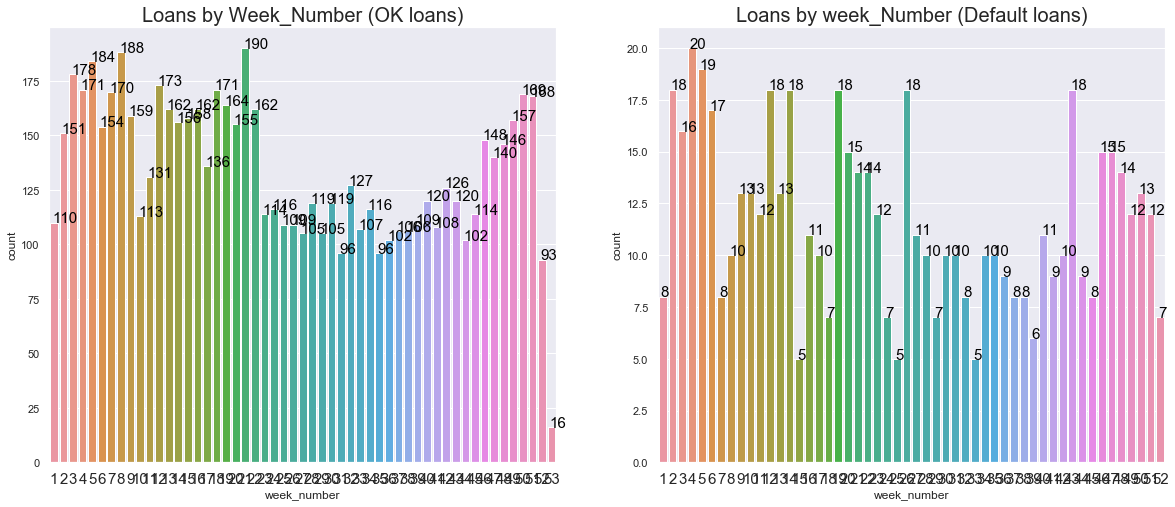

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='week_number',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by Week_Number (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='week_number',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by week_Number (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')

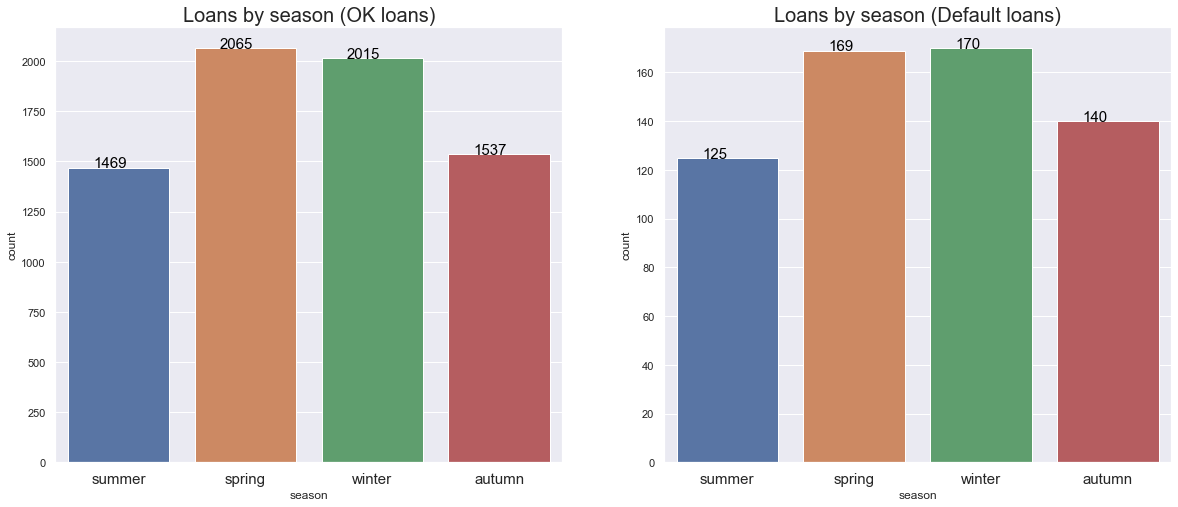

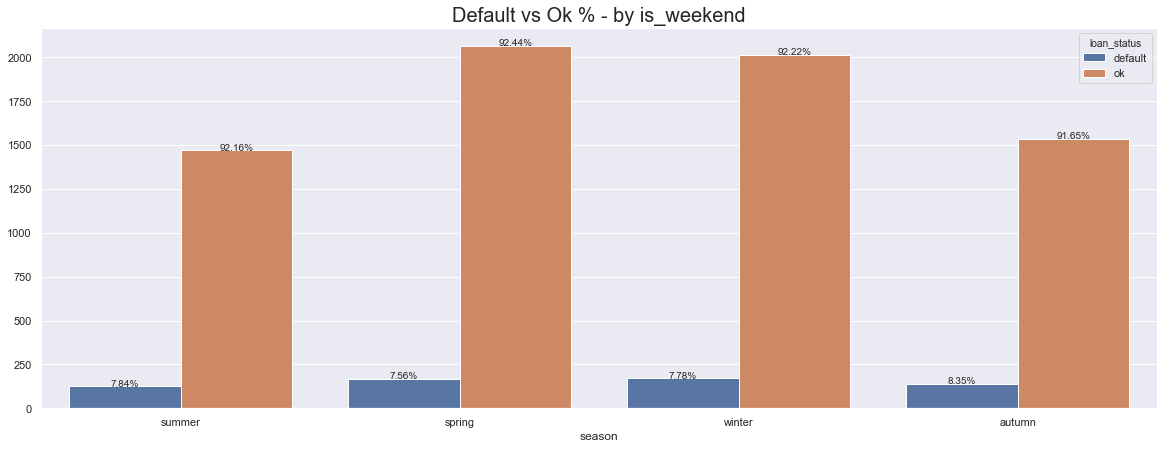

In [26]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='season',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by season (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='season',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by season (Default loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.figure(figsize=(20,7))
order = sorted(df['season'].unique())
ax3 = sns.countplot(x="season", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by is_weekend", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center") 

Text(0.5, 1.0, 'Loans by is_holiday (Default loans)')

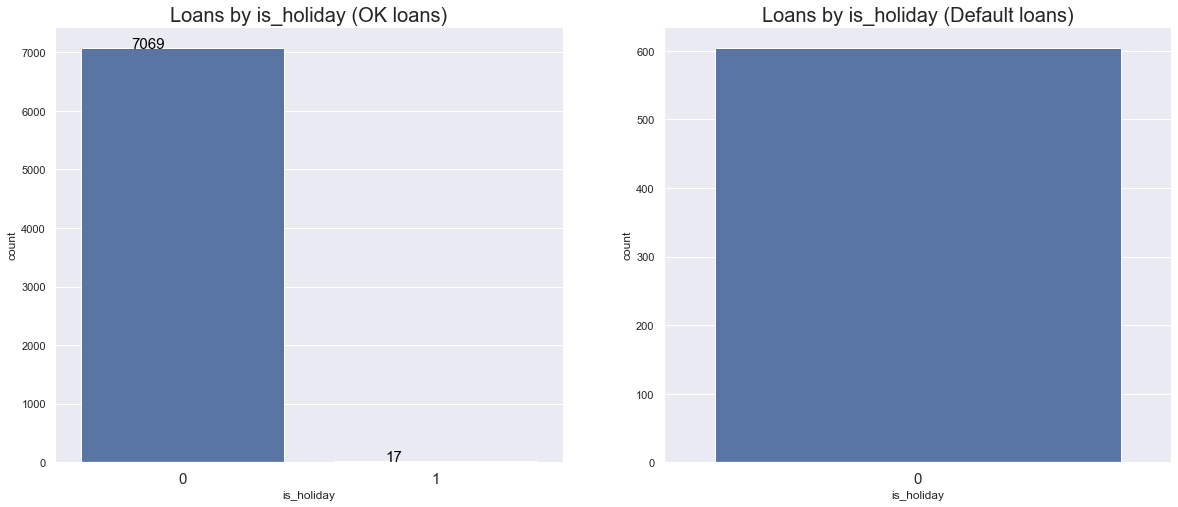

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='is_holiday',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by is_holiday (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='is_holiday',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by is_holiday (Default loans)", fontsize=20)



In [28]:
#occupation - seems to have too mane unique values - not need
len(df['occupation'].unique())

1743

In [29]:
#employ_how_long - Remove words
df.employ_how_long.unique()
df['employ_how_long'] = df['employ_how_long'].astype(str).apply(lambda x: x.strip('or more'))
df.employ_how_long = df.employ_how_long.astype(int)
df.employ_how_long.unique()

array([ 9, 72, 60, 15, 36,  3, 12, 18,  6, 24, 48], dtype=int64)

Text(0.5, 1.0, 'Employed months at current work')

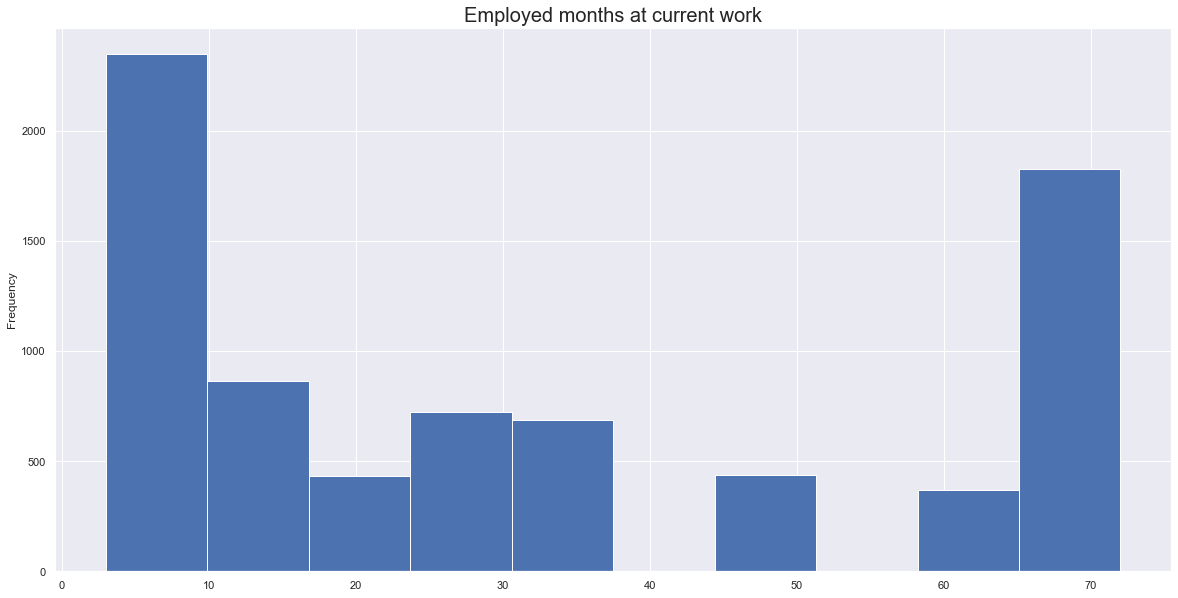

In [30]:
plt.figure(figsize=(20,10))
df['employ_how_long'].plot.hist()
plt.title('Employed months at current work', fontsize=20)

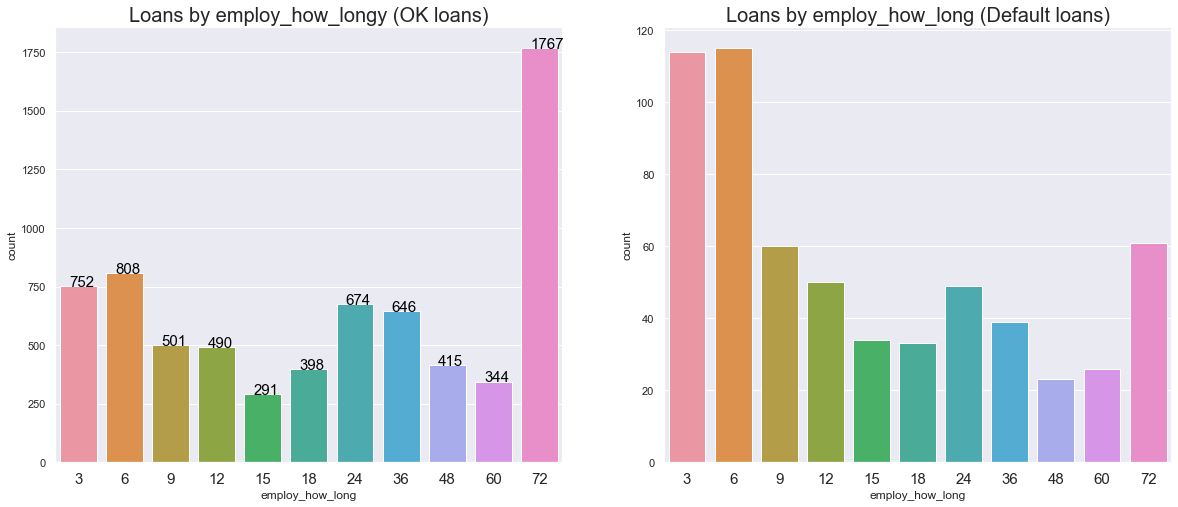

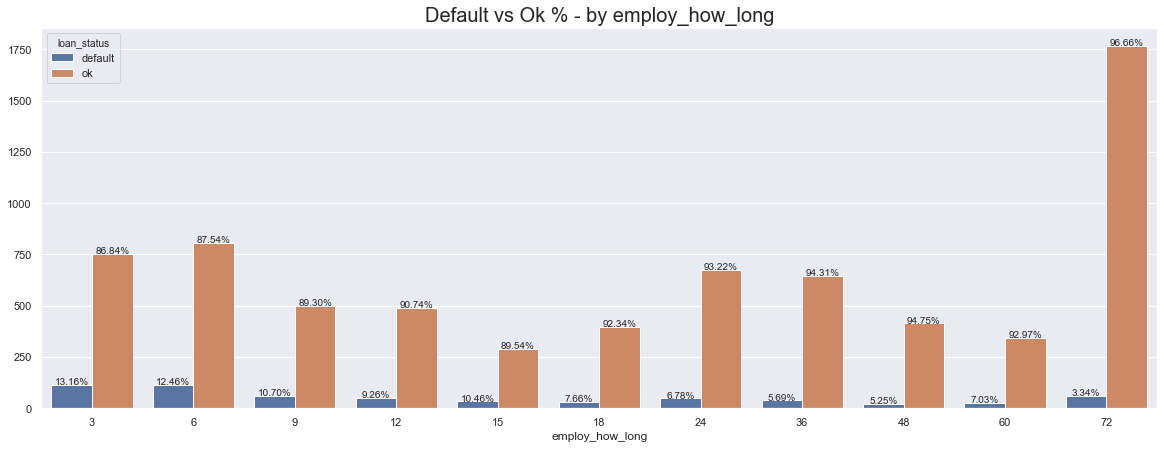

In [31]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
ax = sns.countplot(x='employ_how_long',data=df[df.loan_status == 'ok']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by employ_how_longy (OK loans)", fontsize=20)


for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height(), \
            str(round((i.get_height()),)), fontsize=15, color='black')
    
plt.subplot(1,2,2)    
ax = sns.countplot(x='employ_how_long',data=df[df.loan_status == 'default']);
ax.set_xticklabels(ax.get_xticklabels(),  fontsize=15);
ax.set_title("Loans by employ_how_long (Default loans)", fontsize=20)

plt.figure(figsize=(20,7))
order = sorted(df['employ_how_long'].unique())
ax3 = sns.countplot(x="employ_how_long", hue="loan_status", data=df)
ax3.set_title("Default vs Ok % - by employ_how_long", fontsize=20)
ax3.set_ylabel('')

bars = ax3.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r
    
    ax3.text(left.get_x() + left.get_width()/2., height_l, '{0:.2%}'.format(height_l/total), ha="center")
    ax3.text(right.get_x() + right.get_width()/2., height_r, '{0:.2%}'.format(height_r/total), ha="center") 

* It seems, the longer person is employed, the lower is his risk to default
* The shorter is employment status, the higher risk of defaulting

In [32]:
df.years_working_in_total.unique()

array(['3', '33', '18', '30', '20', '4', '37', '8', '34', '15', '25',
       '32', '12', '19', '16', '10', '22', '5', '36', '6', '1', '29', '2',
       '7', '1.5', '17', '42', '13', '9', '11', '26', '23', '40', '24',
       '14', '31', '35', '21', '39', '28', '27', '44', '3,5', '3.5', '45',
       '41', '0.4', '1.8701', '38', '0.5', '0', '20m', '43', '16 metu',
       '0.3', '5.5', '2.5', '0,4', '0.6', '1.3', '1.6', '1 metai', '2, 4',
       '2m', '5 metai', '0.7', '0.8', '7.5', '47', '1.2', '0,6', '1,5',
       '0,3', '2,5', '1.8', '4.5', '0.9', '8 men', '1.6m', '46',
       '5 mėnesiai', '0,8', '4men', 'virs 10', '2016 08 04', '1metai',
       '10 metų', '20 metu', '9m', '1m', '20 metų', '1.5 m', '4 metai',
       '3 metai', '25+', 'apie 10 m.', '6 metai', '17m.', '2metai'],
      dtype=object)

In [33]:
df.years_working_in_total = df.years_working_in_total.str.replace('[^0-9]', '')
df.years_working_in_total = df.years_working_in_total.astype('int8')

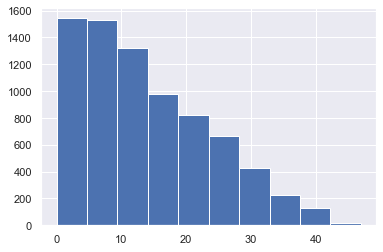

In [34]:
#some workers are working more years than they are aged. Seems this column may be corrupted
df[df.years_working_in_total < df.age].years_working_in_total.hist()

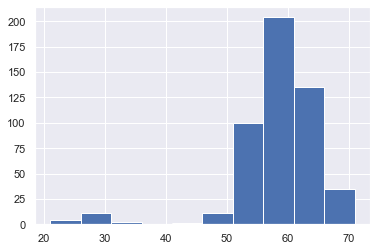

In [35]:
#Dont use - years_working_in_total - may be corrupted
df[df.years_working_in_total > 30].age.hist()

Text(0.5, 1.0, 'monthly_income EUR/Month')

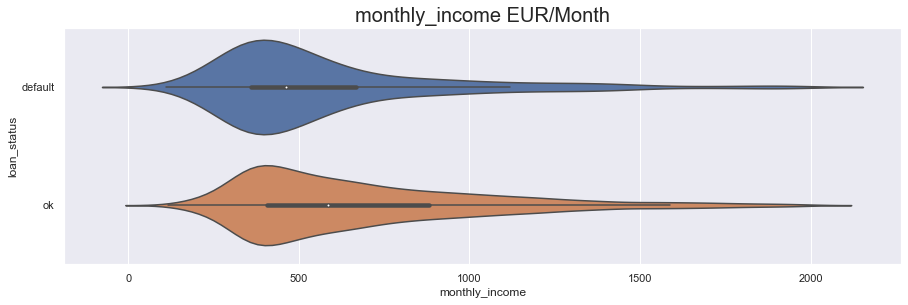

In [36]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
ax = sns.violinplot(x='monthly_income', y='loan_status', data=df[df['monthly_income']<2000],) 
ax.set_title('monthly_income EUR/Month', fontsize=20)

Text(0.5, 1.0, 'monthly_expenses EUR/Month')

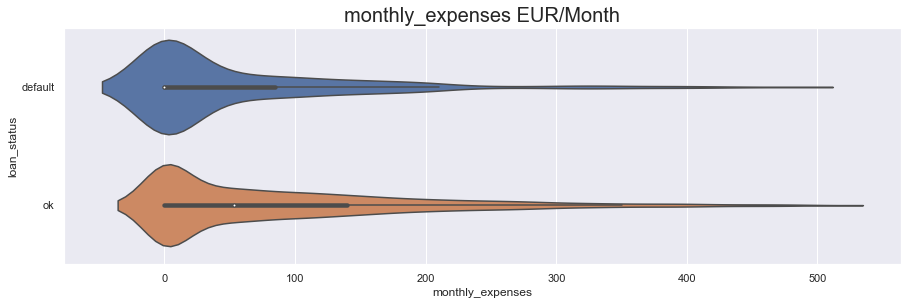

In [37]:
#Drop monthly_expenses - becuase it seems suspicious that more than 50% of people declare ti have expenses less than 100$
plt.figure(figsize=(15,20))
plt.subplot(4,1,2)
ax = sns.violinplot(x='monthly_expenses', y="loan_status", data=df[df['monthly_expenses']<500],) 
ax.set_title('monthly_expenses EUR/Month', fontsize=20)

Text(0.5, 1.0, 'available_income EUR/Month')

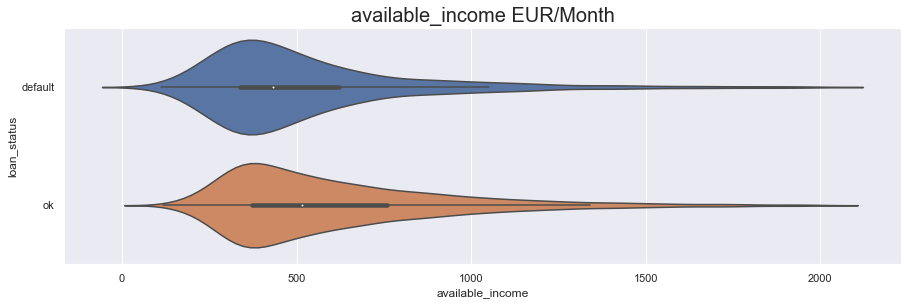

In [38]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='available_income', y='loan_status', data=df[df['available_income']<2000],) 
ax.set_title('available_income EUR/Month', fontsize=20)

Text(0.5, 1.0, 'Debt to Income ration')

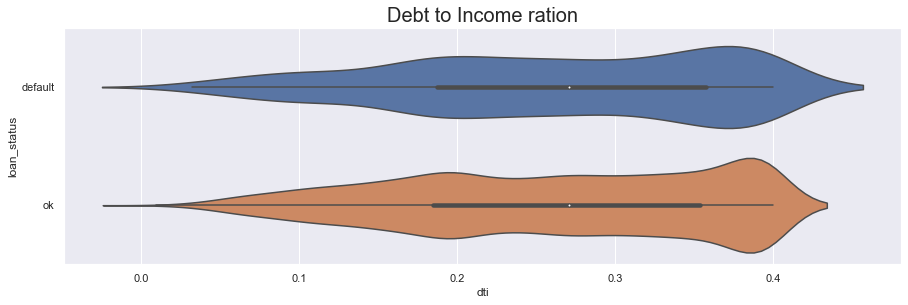

In [39]:
plt.figure(figsize=(15,20))
plt.subplot(4,1,3)
ax = sns.violinplot(x='dti', y='loan_status',data=df,) 
ax.set_title('Debt to Income ration', fontsize=20)

Text(0.5, 1.0, 'outstanding_debts')

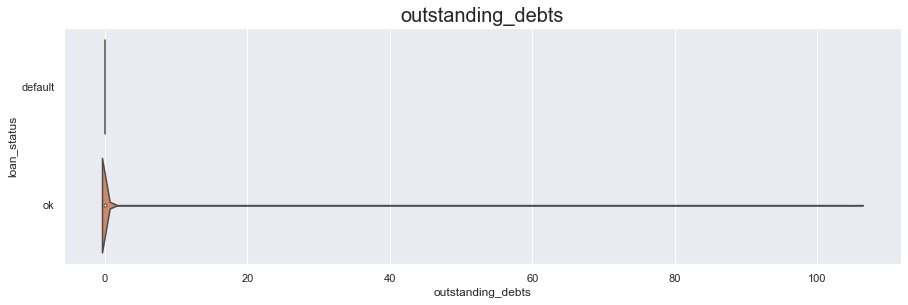

In [40]:
#Drop outstanding debs - seems that no loan takes had any debts
plt.figure(figsize=(15,20))
plt.subplot(4,1,4)
ax = sns.violinplot(x='outstanding_debts', y='loan_status', data=df,) 
ax.set_title('outstanding_debts', fontsize=20)

In [41]:
df.head()

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date,year,month,quarter,dayofweek,dayofweek_name,is_weekend,dayofmonth,dayofyear,week_number,season,season_number,is_holiday,age_group
804,28085,2019-06-01,2019-06-03,2019-07-02,1,1,Kestas1997,"""28085-Automobilis",Car,D,0,1655,45,0.27,0.27,1655.00,68.10,0.00,0.00,204.3,default,FR,Male,Balbieriškis,22,Vocational education,Employed,Technikos priežiūros darbuotojas / Maintenance...,9,3,0,Single,2019-06-01 00:00:00,393,79,314,0.3743,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
805,28084,2019-06-01,2019-06-04,2019-07-04,1,1,92178929,"""28084-Refinansavimas",Consolidation of Other Loans,A,0,1800,15,0.12,0.12,1471.02,134.69,328.98,50.74,0.0,ok,FR,Male,Kaunas,53,Vocational education,Employed,Sandelininkas / Warehouse worker,72,33,0,Married,2019-06-01 00:00:00,906,0,906,0.1487,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
806,28083,2019-06-01,2019-06-04,2019-07-04,1,1,Saulyte3424,"""28083-Vartojimo",Other Purposes,C,0,500,24,0.20,0.20,451.46,27.39,48.54,24.20,0.0,ok,FR,Female,Utena,42,Vocational education,Employed,Vadybininkė / Manager,72,18,0,Married,2019-06-01 00:00:00,601,206,395,0.3883,0,2018-08-24 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
807,28080,2019-06-01,2019-06-04,2019-07-04,1,1,62775937,"""28080-Refinansavimas",Consolidation of Other Loans,D,0,1035,36,0.26,0.26,1001.58,47.17,33.42,44.50,0.0,ok,FR,Female,Šiaulių r. sav. Kairių sen. Eimučių k.,22,Vocational education,Employed,Baldų apmušėja / Furniture upholstered,9,3,0,Single,2019-06-01 00:00:00,487,65,422,0.2303,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
809,28066,2019-06-01,2019-06-05,2019-07-05,1,1,Jj22,"""28066-Vartojimo",Other Purposes,D,0,885,30,0.26,0.26,847.04,44.96,37.96,37.95,0.0,ok,FR,Female,Joniškis,56,Vocational education,Employed,Kepėja / Baker,60,30,1,Married,2019-06-01 00:00:00,853,91,762,0.1594,0,2018-09-06 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50


### Features selection
Based on dataset we see that only following feature may be of value for models

### To use:
1. listing_category
2. loan_amount
3. loan_period
4. effective_rate
5. monthly_installment
6. gender
8. age
9. education
10. employment_status
12. employ_how_long
14. dependants
15. marital_status
16. monthly_income
18. available_income
19. dti
21. year of loan
22. month of loan
23. quarter of loan
24. dayofweek - monday to sunday
25. is_weekend - if loan was created on weekened
26. dayofmonth - day number in a month
27. week_number - number of week in a year
28. season - season when loan was taken
29. is_holiday - if loan was taken on holiday
30. dayofyear
31. age_group
### Not to use:
7. post_town - **Don't use** too many values
11. occupation **Dont use** - too many unique
13. years_working_in_total **Don't use** - corrupted, wrong collection
17. monthly_expenses **Don't use** - more than 50% of borrowers declare less than 100EUr/month expenses
20. outstanding_debts **Don't use** - no data is collected, most are 0

In [42]:
df

,listing_id,creation_date,loan_paid_date,first_installement_date,loan_paid_status,confirm_status,username,listing_title,listing_category,credit_score,job_loss_insurance,loan_amount,loan_period,effective_rate,preferred_rate,amount_outstanding,monthly_installment,principal_repaid,interest_paid,arrears,loan_status,type,gender,post_town,age,education,employment_status,occupation,employ_how_long,years_working_in_total,dependants,marital_status,credit_check_date,monthly_income,monthly_expenses,available_income,dti,outstanding_debts,last_debt_date,year,month,quarter,dayofweek,dayofweek_name,is_weekend,dayofmonth,dayofyear,week_number,season,season_number,is_holiday,age_group
804,28085,2019-06-01,2019-06-03,2019-07-02,1,1,Kestas1997,"""28085-Automobilis",Car,D,0,1655,45,0.2700,0.27,1655.00,68.10,0.00,0.00,204.3,default,FR,Male,Balbieriškis,22,Vocational education,Employed,Technikos priežiūros darbuotojas / Maintenance...,9,3,0,Single,2019-06-01 00:00:00,393,79,314,0.3743,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
805,28084,2019-06-01,2019-06-04,2019-07-04,1,1,92178929,"""28084-Refinansavimas",Consolidation of Other Loans,A,0,1800,15,0.1200,0.12,1471.02,134.69,328.98,50.74,0.0,ok,FR,Male,Kaunas,53,Vocational education,Employed,Sandelininkas / Warehouse worker,72,33,0,Married,2019-06-01 00:00:00,906,0,906,0.1487,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
806,28083,2019-06-01,2019-06-04,2019-07-04,1,1,Saulyte3424,"""28083-Vartojimo",Other Purposes,C,0,500,24,0.2000,0.20,451.46,27.39,48.54,24.20,0.0,ok,FR,Female,Utena,42,Vocational education,Employed,Vadybininkė / Manager,72,18,0,Married,2019-06-01 00:00:00,601,206,395,0.3883,0,2018-08-24 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
807,28080,2019-06-01,2019-06-04,2019-07-04,1,1,62775937,"""28080-Refinansavimas",Consolidation of Other Loans,D,0,1035,36,0.2600,0.26,1001.58,47.17,33.42,44.50,0.0,ok,FR,Female,Šiaulių r. sav. Kairių sen. Eimučių k.,22,Vocational education,Employed,Baldų apmušėja / Furniture upholstered,9,3,0,Single,2019-06-01 00:00:00,487,65,422,0.2303,0,-,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,19 to 23
809,28066,2019-06-01,2019-06-05,2019-07-05,1,1,Jj22,"""28066-Vartojimo",Other Purposes,D,0,885,30,0.2600,0.26,847.04,44.96,37.96,37.95,0.0,ok,FR,Female,Joniškis,56,Vocational education,Employed,Kepėja / Baker,60,30,1,Married,2019-06-01 00:00:00,853,91,762,0.1594,0,2018-09-06 00:00:00,2019,6,2,6,Saturday,1,1,152,22,summer,2,0,40 to 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,38,2015-08-19,2015-08-25,2015-09-25,1,3,Elegi,"""Paskolu refinansavimui",Consolidation of Other Loans,D,0,2250,18,0.3156,0.30,0.00,158.52,2250.01,603.37,0.0,ok,B,Female,"Trakų rajonas, Bražuolės kaimas",40,Graduate,Employed,Barmenė,72,12,2,Married,-,420,0,420,0.3626,0,-,2015,8,3,3,Wednesday,0,19,231,34,summer,2,0,40 to 50
9010,28,2015-08-18,2015-08-21,2015-09-21,1,3,egle,"""Persiskolinti",Consolidation of Other Loans,C,0,2000,27,0.2583,0.25,0.00,1277.55,2000.01,458.90,0.0,ok,B,Female,Šilutė,36,Post graduate,Employed,Valstybės tarnautoja/Public servant,48,8,0,Single,2015-11-17 00:00:00,900,127,773,0.2496,0,-,2015,8,3,2,Tuesday,0,18,230,34,summer,2,0,30 to 40
9011,3,2015-08-13,2015-08-20,2015-09-20,1,3,Algirdas,"""Vartojimo paskola, vartojimui, mokinimosi išl...",Other Purposes,D,0,1300,24,0.2525,0.25,0.00,690.85,1299.99,294.96,0.0,ok,B,Male,Kaunas,29,Post graduate,Employed,Inžinierius-projektuotojas,9,2,0,Single,-,510,14,496,0.1635,0,-,2015,8,3,4,Thursday,0,13,225,33,summer,2,0,23 to 30
9012,2,2015-08-12,2015-08-28,2015-09-27,1,1,Bitute,"""Refinansavimas",Consolidation of Other Loans,C,0,2700,54,0.2582,0.20,473.87,85.03,2226.13,1855.32,0.0,ok,B,Female,Vilnius,33,Post graduate,Employed,Specialistė / Specialist,60,10,0,Single,-,590,0,590,0.1292,0,-,2015,8,3,3,Wednesday,0,12,224,33,summer,2,0,30 t

In [201]:
#Dropping unneeded columnts to free some memory
'''df = df.drop(columns=['loan_paid_date','first_installement_date','loan_paid_status','confirm_status',
                'post_town', 'occupation','username','listing_title','job_loss_insurance', 'preferred_rate', 
                 'amount_outstanding', 'principal_repaid', 'interest_paid', 'arrears', 'type', 'credit_check_date',
                 'years_working_in_total', 'monthly_expenses','outstanding_debts', 'last_debt_date' ])'''

"df = df.drop(columns=['loan_paid_date','first_installement_date','loan_paid_status','confirm_status',\n                'post_town', 'occupation','username','listing_title','job_loss_insurance', 'preferred_rate', \n                 'amount_outstanding', 'principal_repaid', 'interest_paid', 'arrears', 'type', 'credit_check_date',\n                 'years_working_in_total', 'monthly_expenses','outstanding_debts', 'last_debt_date' ])"

In [202]:
baseline_features = ['listing_category','credit_score','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti','year','month','dayofmonth']

target = ['loan_status']

## Baseline Model
1. Convert into numericals
2. Scale/Normalize?
3. Encode Label + Onehot?
4. Baseline model split into train, valid, test
5. Train
6. Valid
7. Test

In [289]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

In [290]:
#Copy original df
baseline_df = df.copy()

In [291]:
#split data into 3 pieces (train 60%, valid 20%, test 20%)
from sklearn.model_selection import train_test_split
train, test = train_test_split(baseline_df, test_size=0.4, random_state=1)
valid, test = train_test_split(test, test_size=0.5, random_state=1)

## Preprocessing with Pipelines

In [292]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer


#selection of Categorical and numerical columns
categorical_cols = train[baseline_features].select_dtypes(include=['object']).columns
numerical_cols = train[baseline_features].select_dtypes(include=['int64', 'float64']).columns


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    #('scaler', StandardScaler()),
    ('normalizer',Normalizer())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model selection with Pipelines

In [293]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    SVC(gamma='auto'), 
    LinearSVC(),
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(train[baseline_features], train.loan_status)   
    print(classifier)
    print("model score: %.3f" % pipe.score(valid[baseline_features], valid.loan_status))
    y_pred = pipe.predict(valid[baseline_features])
    target_names = ['default', 'ok']
    print('Recall',classification_report(valid.loan_status, y_pred, target_names=target_names))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.877
Recall               precision    recall  f1-score   support

     default       0.24      0.23      0.23       124
          ok       0.93      0.93      0.93      1414

    accuracy                           0.88      1538
   macro avg       0.58      0.58      0.58      1538
weighted avg       0.88      0.88      0.88      1538

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
       

c:\users\val\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\val\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Baseline model with balancing data 

In [294]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train= ros.fit_resample(train[baseline_features], train.loan_status)

Text(0.5, 1.0, 'After balancing (Loan status)')

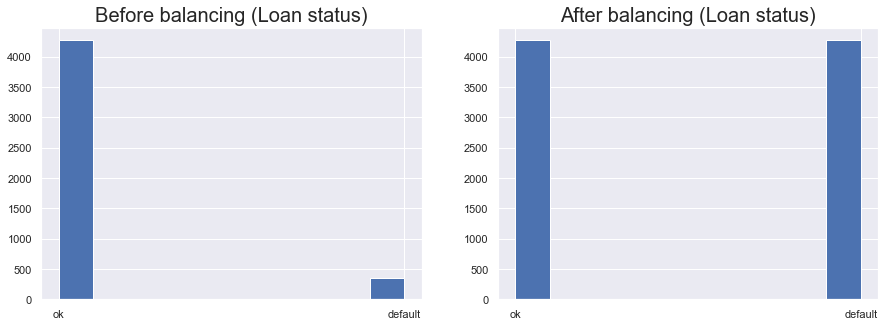

In [295]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
train.loan_status.hist().set_title('Before balancing (Loan status)', fontsize=20)
plt.subplot(1,2,2)
y_train.hist().set_title('After balancing (Loan status)', fontsize=20)

In [306]:
#selection of Categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    #('scaler', StandardScaler()),
    ('normalizer',Normalizer())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    SVC(gamma='auto'), 
    LinearSVC(),
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(valid[baseline_features], valid.loan_status))
    y_pred = pipe.predict(valid[baseline_features])
    target_names = ['default', 'ok']
    print('Recall',classification_report(valid.loan_status, y_pred, target_names=target_names))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.876
Recall               precision    recall  f1-score   support

     default       0.24      0.25      0.25       124
          ok       0.93      0.93      0.93      1414

    accuracy                           0.88      1538
   macro avg       0.59      0.59      0.59      1538
weighted avg       0.88      0.88      0.88      1538

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
       

In [ ]:
param_grid = [
    loss = {‘deviance’, ‘exponential’}
    learning_rate = 
    n_estimators = 
    
]

gbc = GradientBoostingClassifier(n_estimators=100)




## Better model building

- Do feature preprocessing.
- Build a machine learning model.
- Explore your model results.
- Compare multiple machine learning models.
- Do hyperparameter tuning.
- Use a pipeline
- Data imputation etc.
- Analyse feature importance in models

### Baseline Features + Some new features

* 'quarter'
* 'dayofweek'
* 'is_weekend'
* 'dayofmonth'
* 'dayofyear'
* 'week_number'
* 'season_number'
* 'is_holiday'
* 'age_group'

In [307]:
features = ['listing_category','credit_score','loan_amount','loan_period','effective_rate','monthly_installment',
            'gender','age','education','employment_status','employ_how_long','dependants',
            'marital_status','monthly_income','available_income','dti','year','month', 
            'quarter', 'dayofweek', 'is_weekend', 'dayofmonth', 'dayofyear',
            'week_number','season_number','is_holiday','age_group',]

target = ['loan_status']

In [308]:
print('Train size:',train.shape)
print('Test size:', test.shape,)
print('Valid size:',valid.shape,)

Train size: (4614, 28)
Test size: (1538, 28)
Valid size: (1538, 28)


### Balance train dataset

In [300]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train= ros.fit_resample(train[baseline_features], train.loan_status)

### Preprocessing with Pipelines

In [309]:
#selection of Categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='median')),
    #('scaler', StandardScaler()),
    ('normalizer',Normalizer())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model selection with Pipelines

In [310]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    SVC(gamma='auto'), 
    LinearSVC(),
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(train[features], train.loan_status)   
    print(classifier)
    print("model score: %.3f" % pipe.score(valid[features], valid.loan_status))
    y_pred = pipe.predict(valid[features])
    target_names = ['default', 'ok']
    print('Recall',classification_report(valid.loan_status, y_pred, target_names=target_names))
    
    
    
    

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.880
Recall               precision    recall  f1-score   support

     default       0.25      0.25      0.25       124
          ok       0.93      0.94      0.93      1414

    accuracy                           0.88      1538
   macro avg       0.59      0.59      0.59      1538
weighted avg       0.88      0.88      0.88      1538

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
       

c:\users\val\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\val\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest - Validation set 
               precision    recall  f1-score   support

     default       0.83      0.04      0.08       124
          ok       0.92      1.00      0.96      1414

    accuracy                           0.92      1538
   macro avg       0.88      0.52      0.52      1538
weighted avg       0.92      0.92      0.89      1538



## Model Selection with Pipelines

In [172]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.tree import DecisionTreeClassifier


classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    SVC(gamma='auto'), 
    LinearSVC(),
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(train[features], train.loan_status)   
    print(classifier)
    print("model score: %.3f" % pipe.score(valid[features], valid.loan_status))
    y_pred = pipe.predict(valid[features])
    target_names = ['default', 'ok']
    print('Recall',classification_report(valid.loan_status, y_pred, target_names=target_names))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.887
Recall               precision    recall  f1-score   support

     default       0.30      0.31      0.30       124
          ok       0.94      0.94      0.94      1414

    accuracy                           0.89      1538
   macro avg       0.62      0.62      0.62      1538
weighted avg       0.89      0.89      0.89      1538

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
       

c:\users\val\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\val\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
## Feature importance - needs to be added. But which model?
## Parameter Tuninig 

Feature ranking:
listing_category 1. feature 5 (0.202819)
credit_score 2. feature 1 (0.113805)
loan_amount 3. feature 2 (0.068837)
loan_period 4. feature 7 (0.059720)
effective_rate 5. feature 13 (0.055934)
monthly_installment 6. feature 14 (0.055036)
gender 7. feature 3 (0.049400)
age 8. feature 10 (0.048328)
education 9. feature 22 (0.046971)
employment_status 10. feature 21 (0.041369)
employ_how_long 11. feature 23 (0.035611)
dependants 12. feature 16 (0.026513)
marital_status 13. feature 8 (0.025580)
monthly_income 14. feature 19 (0.024921)
available_income 15. feature 12 (0.023177)
dti 16. feature 0 (0.020809)
year 17. feature 26 (0.019228)
month 18. feature 17 (0.019094)
quarter 19. feature 6 (0.018986)
dayofweek 20. feature 11 (0.016061)
is_weekend 21. feature 24 (0.010105)
dayofmonth 22. feature 18 (0.009073)
dayofyear 23. feature 9 (0.005268)
week_number 24. feature 20 (0.003259)
season_number 25. feature 25 (0.000096)
is_holiday 26. feature 15 (0.000000)
age_group 27. feature

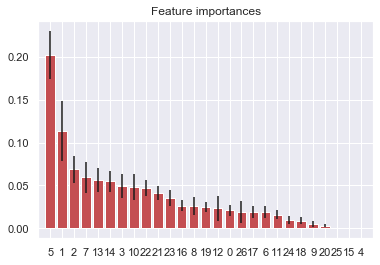

In [371]:
importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_train[features].shape[1]):
    print(features[f],"%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train[features].shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train[features].shape[1]), indices)
plt.xlim([-1, X_train[features].shape[1]])
plt.show()

## Suggestions
1. Gather more date, potentially from other p2p lending platforms in Lithuania
2. Train models with more data for training, fewer for testing?

In [ ]:
## Comments to finbee.lt
1. Would be nice to have more recent data
2. Some data is definitely collected wrongly (years_working_in_total)
3. monthly_expenses - More than 50% have lower than 100EUR/month - very suspicious
4. outstanding_debts - most are 0, no data is collected